# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

In [2]:
df=pd.read_csv("C:/Users/ssour/Downloads/Census Income (1).csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Here the top 10 data in these datasets
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
# Here the last 10 data in these datasets
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# Here we can see that the columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
df.shape

(32560, 15)

Here we can see that in these datsets contains 18249 rows and 14 columns

In [7]:
print("The Dimensions of Datasets: ",df.shape)
print("The columns of the datasets: ",df.columns)

The Dimensions of Datasets:  (32560, 15)
The columns of the datasets:  Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Now we cheking the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

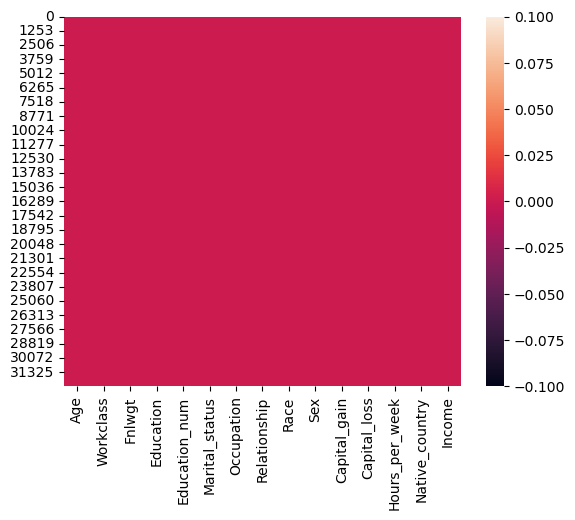

In [10]:
# Now check null values using heatmap
sns.heatmap(df.isnull())

Here we can see that there is no null values present 

In [11]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [12]:
# Now checking the datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [13]:
# Now separating categorical columns and numercial columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_col :",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numercial_col :",numerical_col)

Categorical_col : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numercial_col : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [14]:
# Now we checking the number of uniques values
df.nunique().to_frame("No. of uniques values")

,No. of uniques values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


# Now we check unique values

In [15]:
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [17]:
df["Education_num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [18]:
df["Marital_status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [19]:
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [20]:
df["Relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [21]:
df["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [22]:
df["Sex"].unique()

array([' Male', ' Female'], dtype=object)

In [23]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [24]:
df["Native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [25]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [26]:
count = df["Income"].count()
print("Number of non-null entries in 'Income' column:", count)

Number of non-null entries in 'Income' column: 32560


# Data Visualization

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


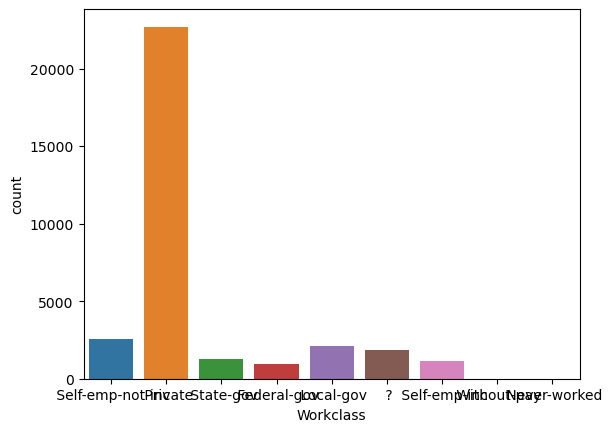

In [27]:
# visualize the number of  Workclass
ax=sns.countplot(x='Workclass',data=df)
print(df['Workclass'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


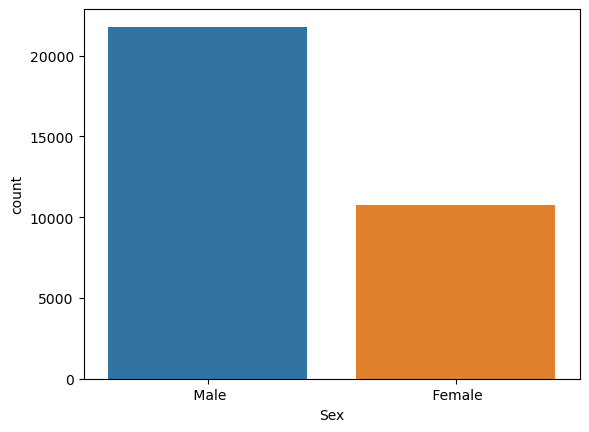

In [28]:
# visualize the number of  Sex
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

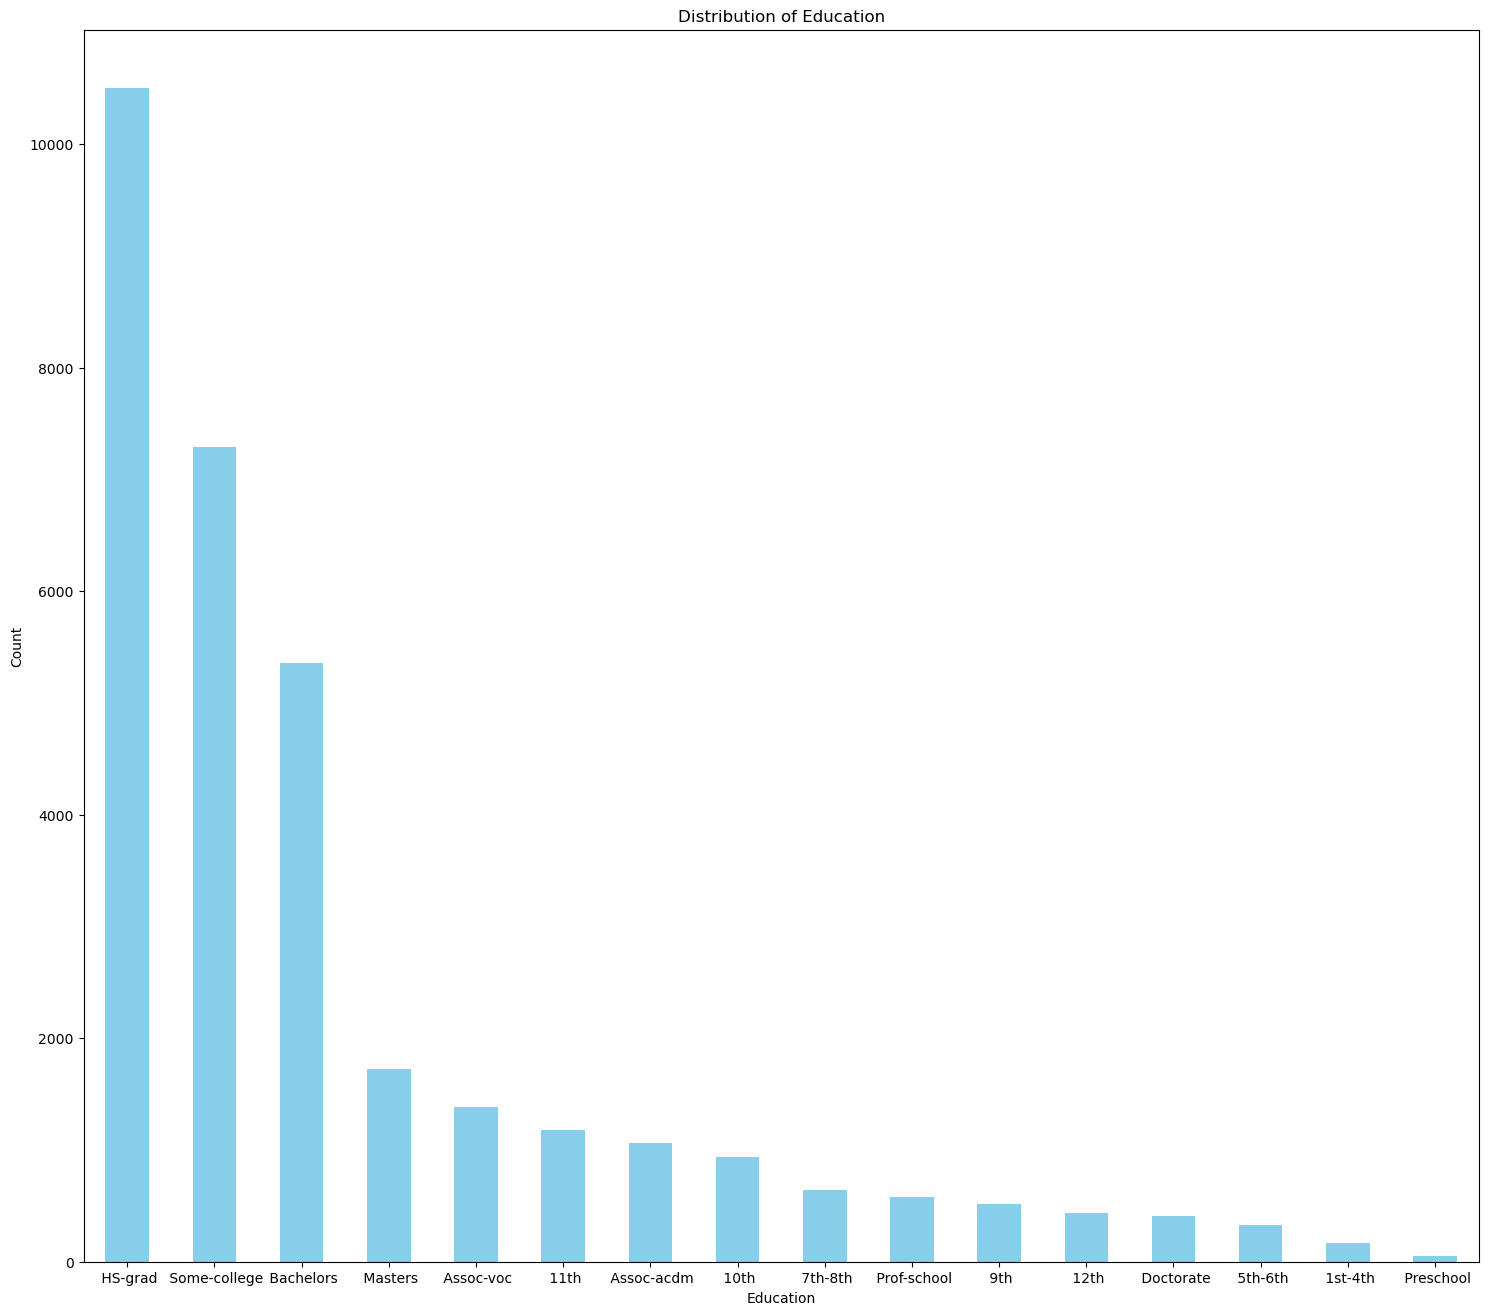

In [29]:
# Assuming df is your DataFrame and it has a column named 'Education'
job_counts = df["Education"].value_counts()

plt.figure(figsize=(18,16))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

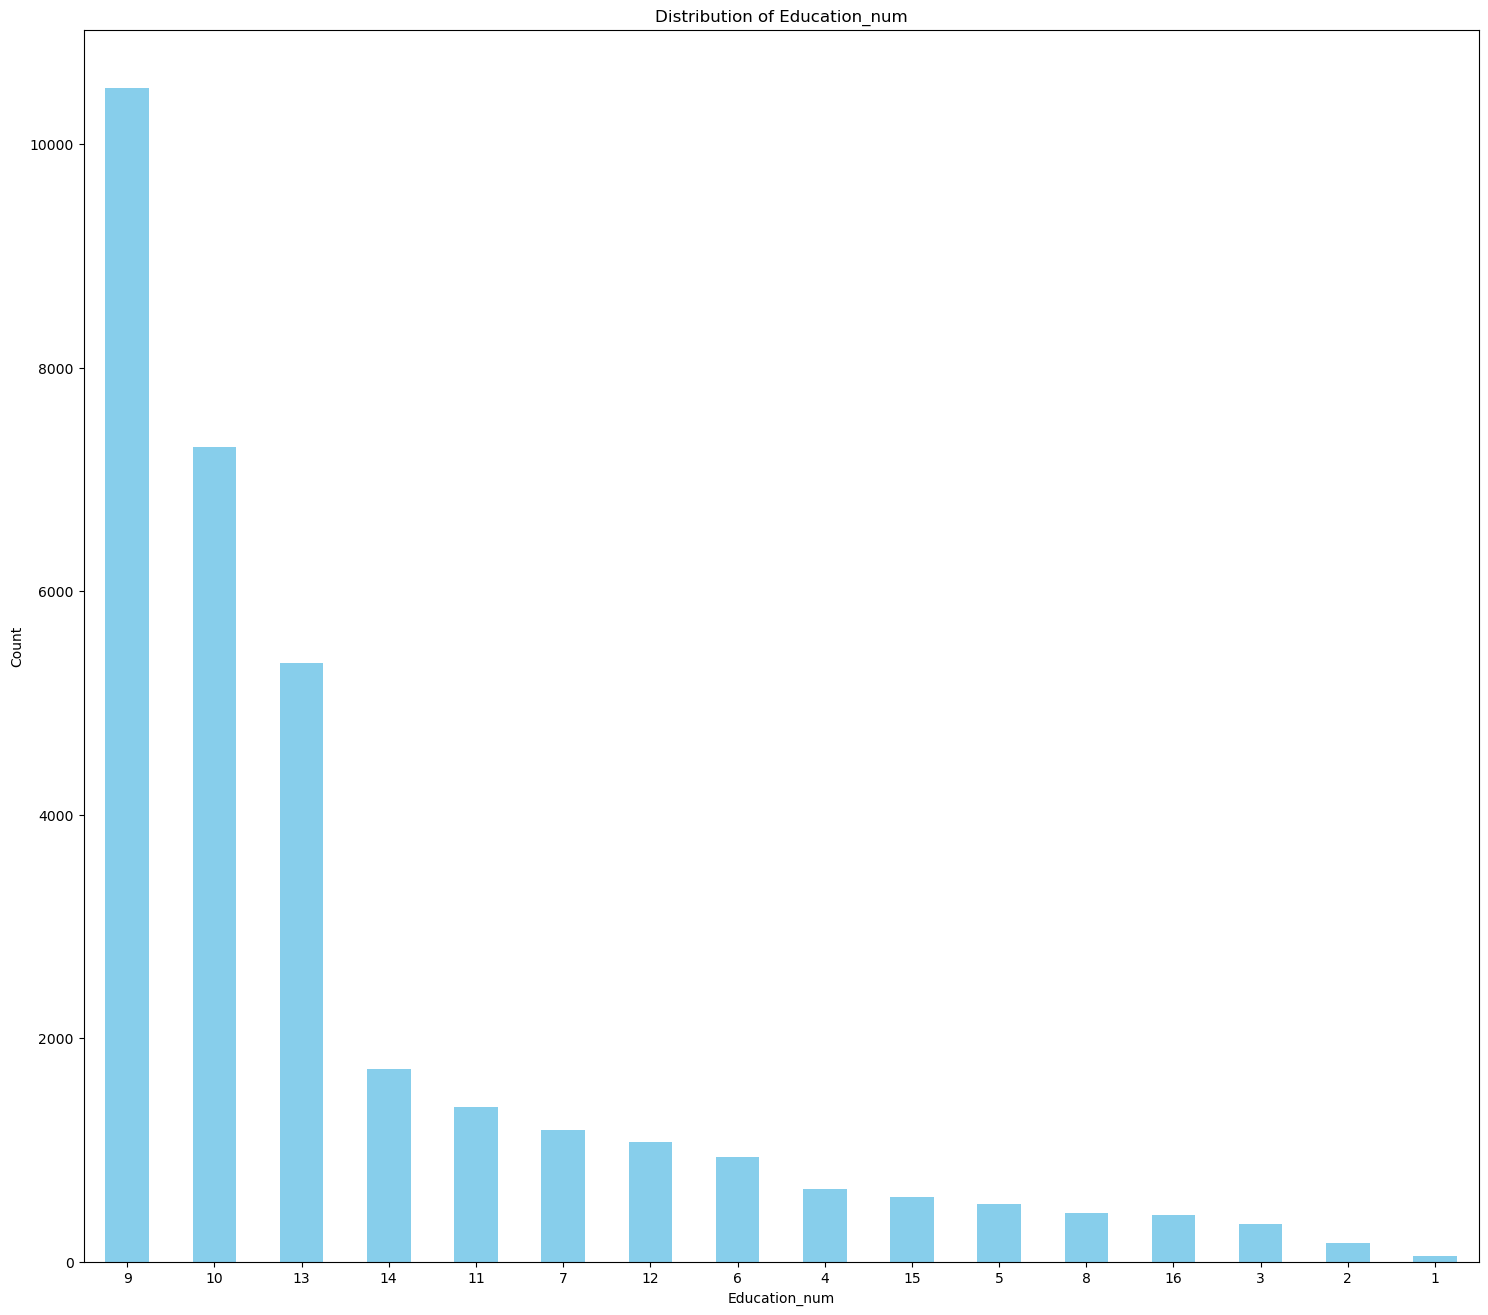

In [30]:
# Assuming df is your DataFrame and it has a column named 'Education_num'
job_counts = df["Education_num"].value_counts()

plt.figure(figsize=(18,16))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of Education_num")
plt.xlabel("Education_num")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

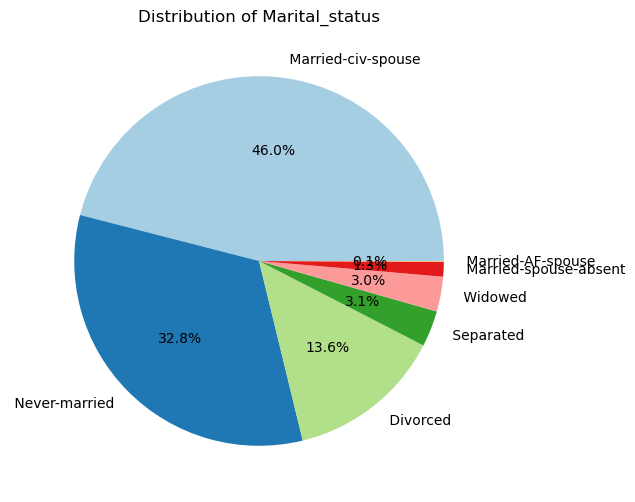

In [31]:
# Assuming df is your DataFrame and it has a column named 'Marital_status'
job_counts = df["Marital_status"].value_counts()

plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Marital_status")
plt.ylabel("")  # Hide the y-label

plt.show()

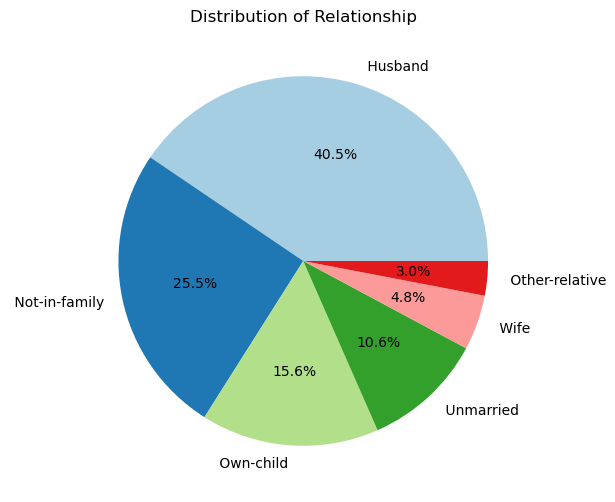

In [32]:
# Assuming df is your DataFrame and it has a column named 'Relationship'
job_counts = df["Relationship"].value_counts()

plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Relationship")
plt.ylabel("")  # Hide the y-label

plt.show()

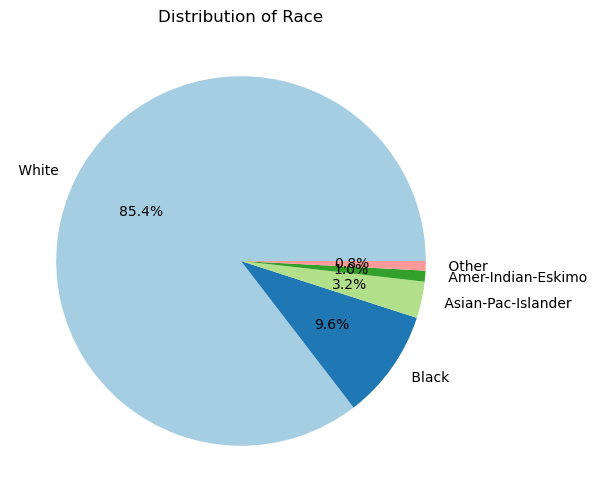

In [33]:
# Assuming df is your DataFrame and it has a column named 'Race'
job_counts = df["Race"].value_counts()

plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Race")
plt.ylabel("")  # Hide the y-label

plt.show()

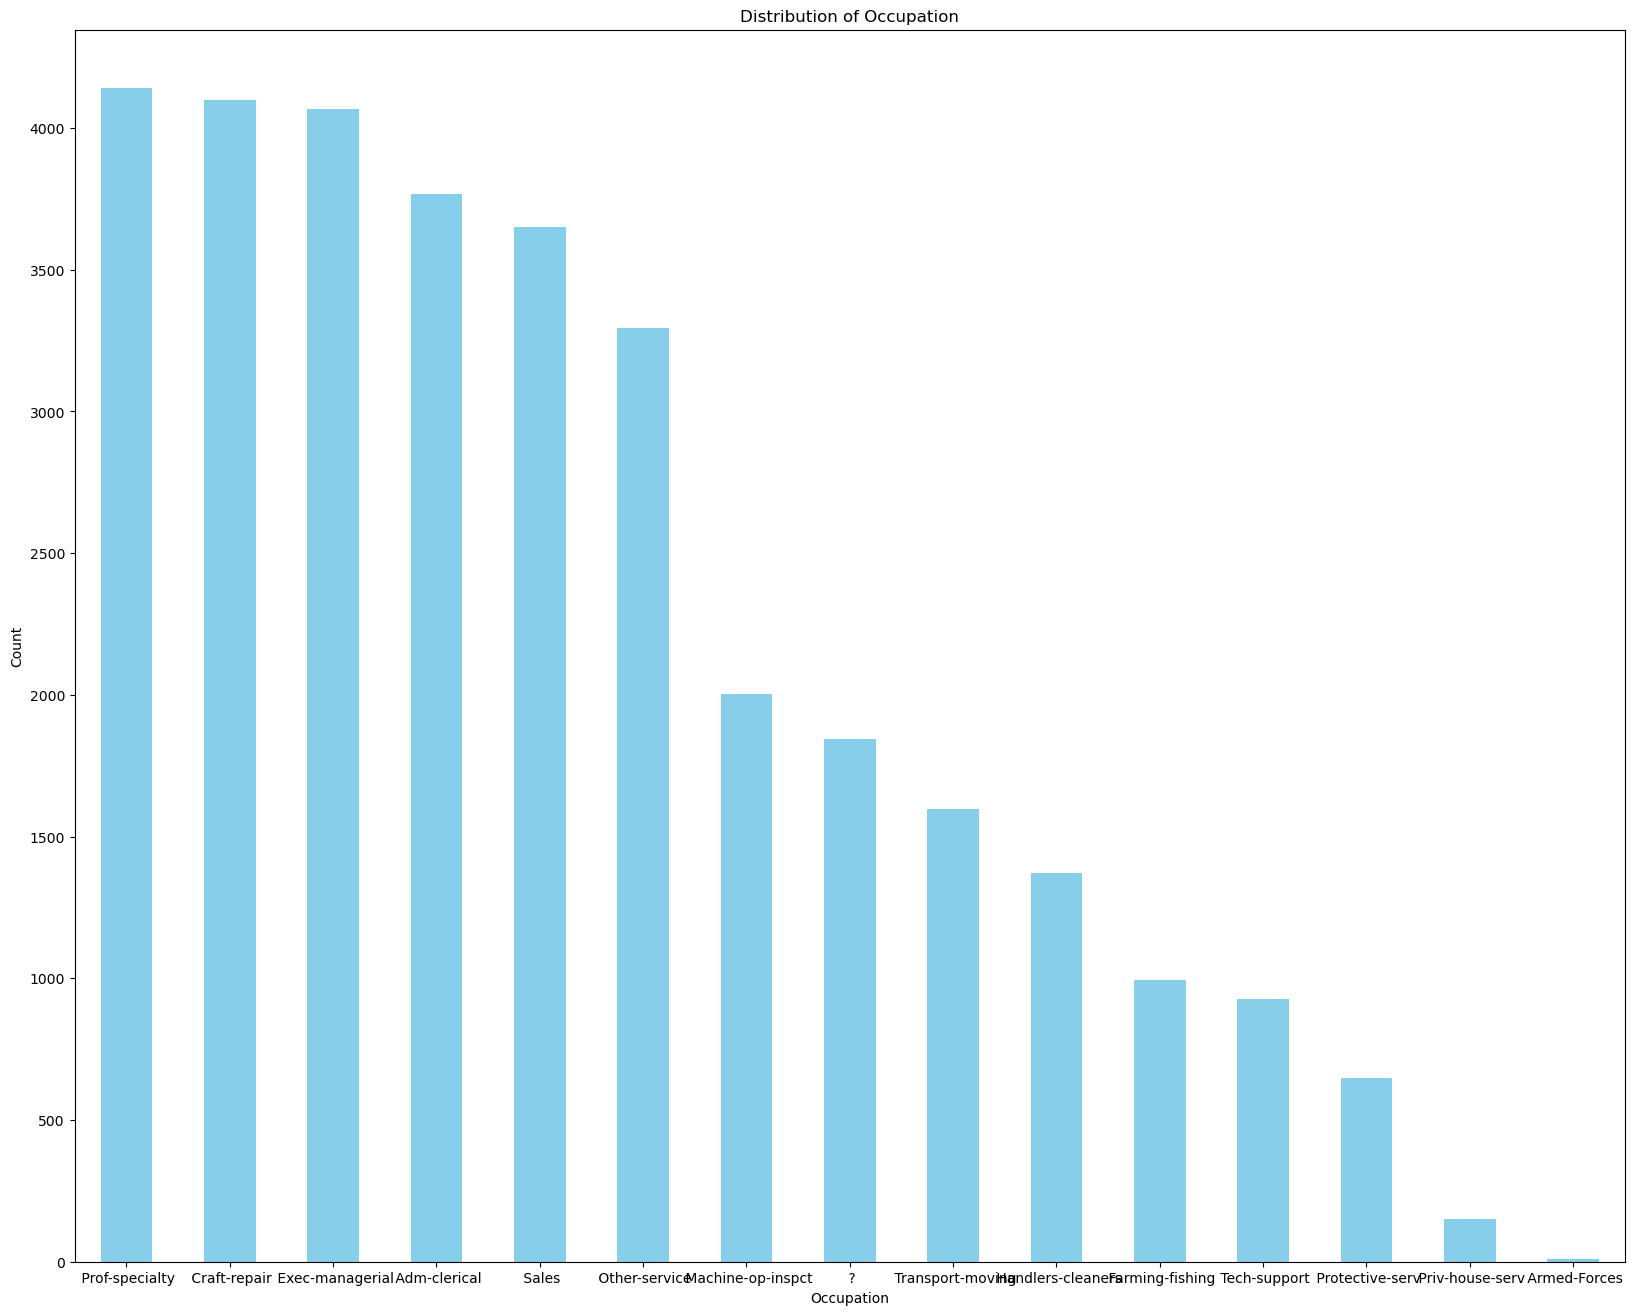

In [34]:
# Assuming df is your DataFrame and it has a column named 'Occupation'
job_counts = df["Occupation"].value_counts()

plt.figure(figsize=(20,16))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

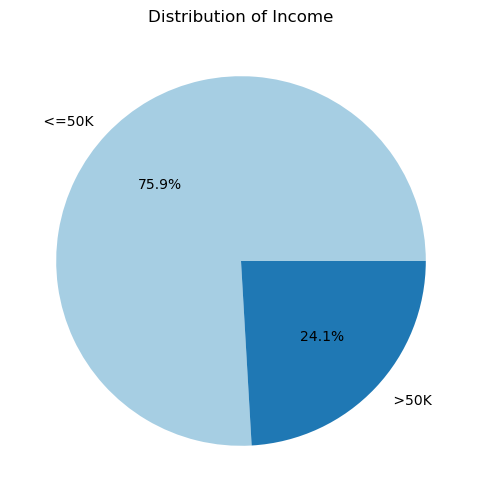

In [35]:
# Assuming df is your DataFrame and it has a column named 'Income'
job_counts = df["Income"].value_counts()

plt.figure(figsize=(8,6))
job_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Income")
plt.ylabel("")  # Hide the y-label

plt.show()

# Relational Analysis

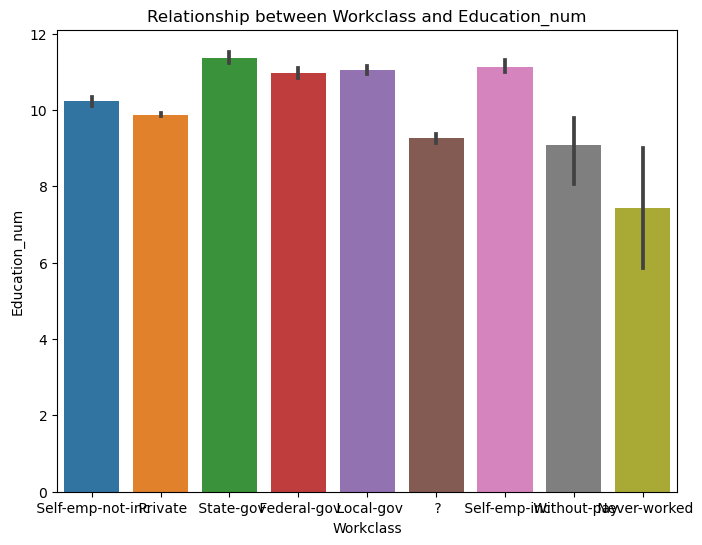

In [36]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Workclass", y="Education_num", data=df)

# Set labels and title
plt.xlabel("Workclass")
plt.ylabel("Education_num")
plt.title("Relationship between Workclass and Education_num")

# Show the plot
plt.show()

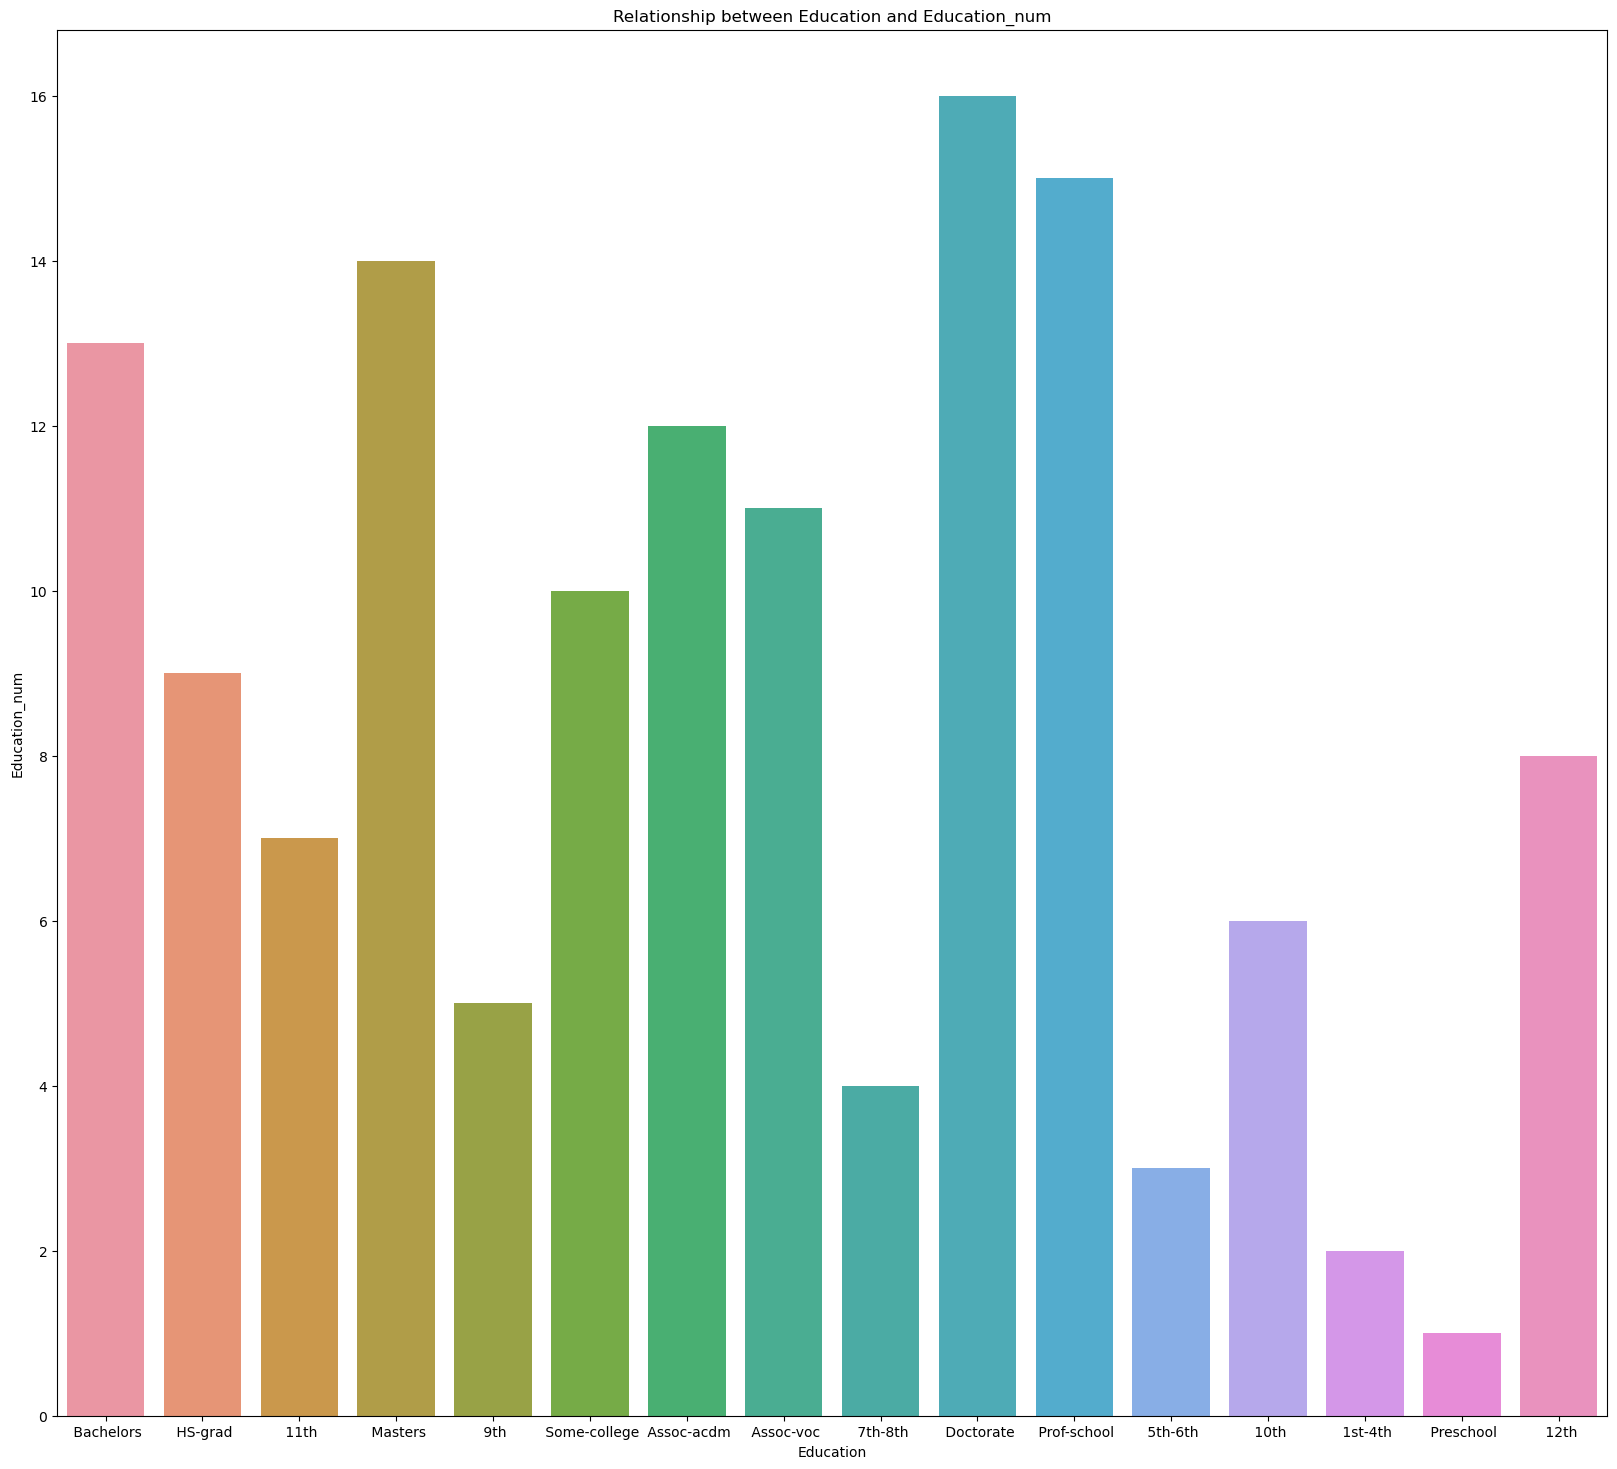

In [37]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Education", y="Education_num", data=df)

# Set labels and title
plt.xlabel("Education")
plt.ylabel("Education_num")
plt.title("Relationship between Education and Education_num")

# Show the plot
plt.show()

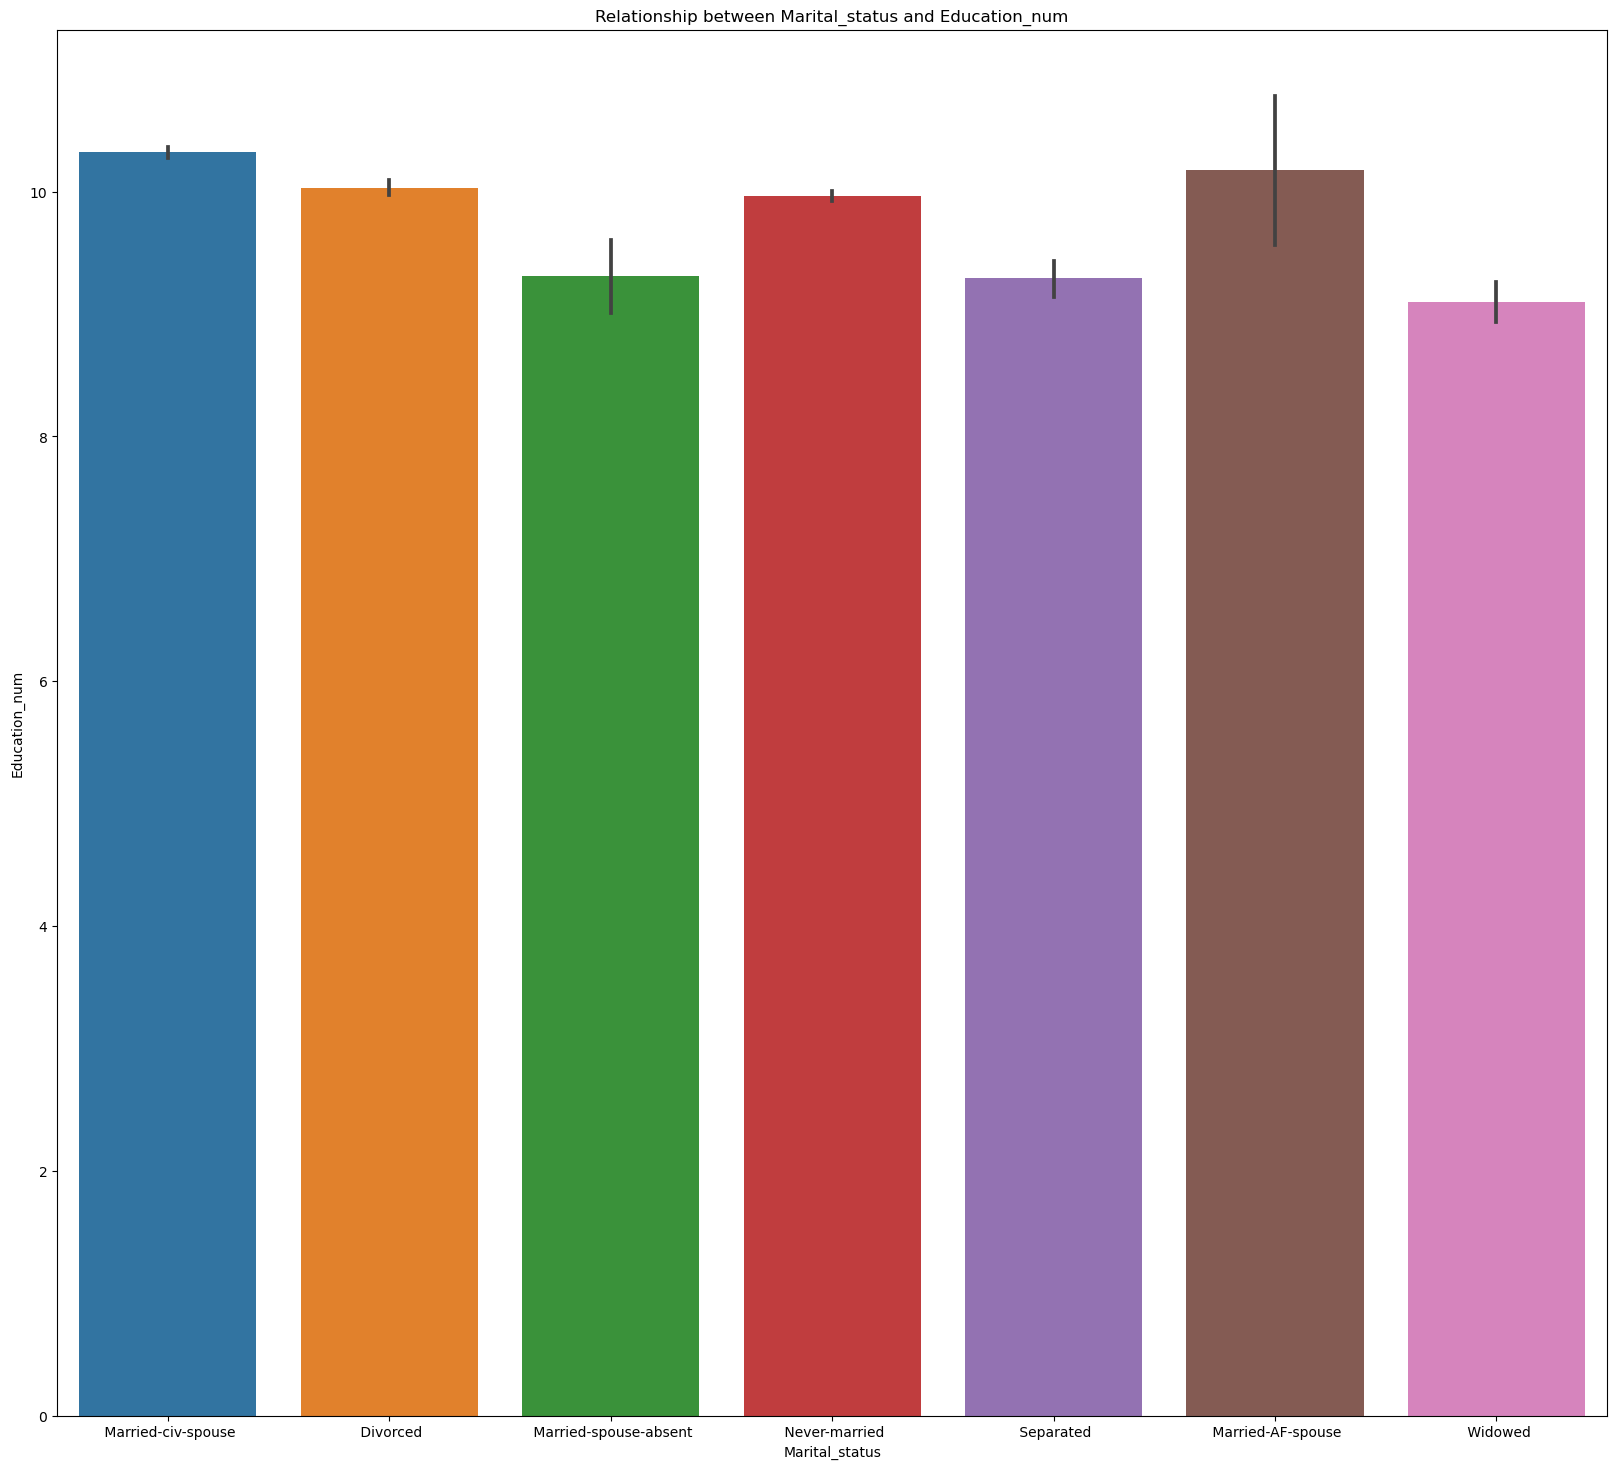

In [38]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Marital_status", y="Education_num", data=df)

# Set labels and title
plt.xlabel("Marital_status")
plt.ylabel("Education_num")
plt.title("Relationship between Marital_status and Education_num")

# Show the plot
plt.show()

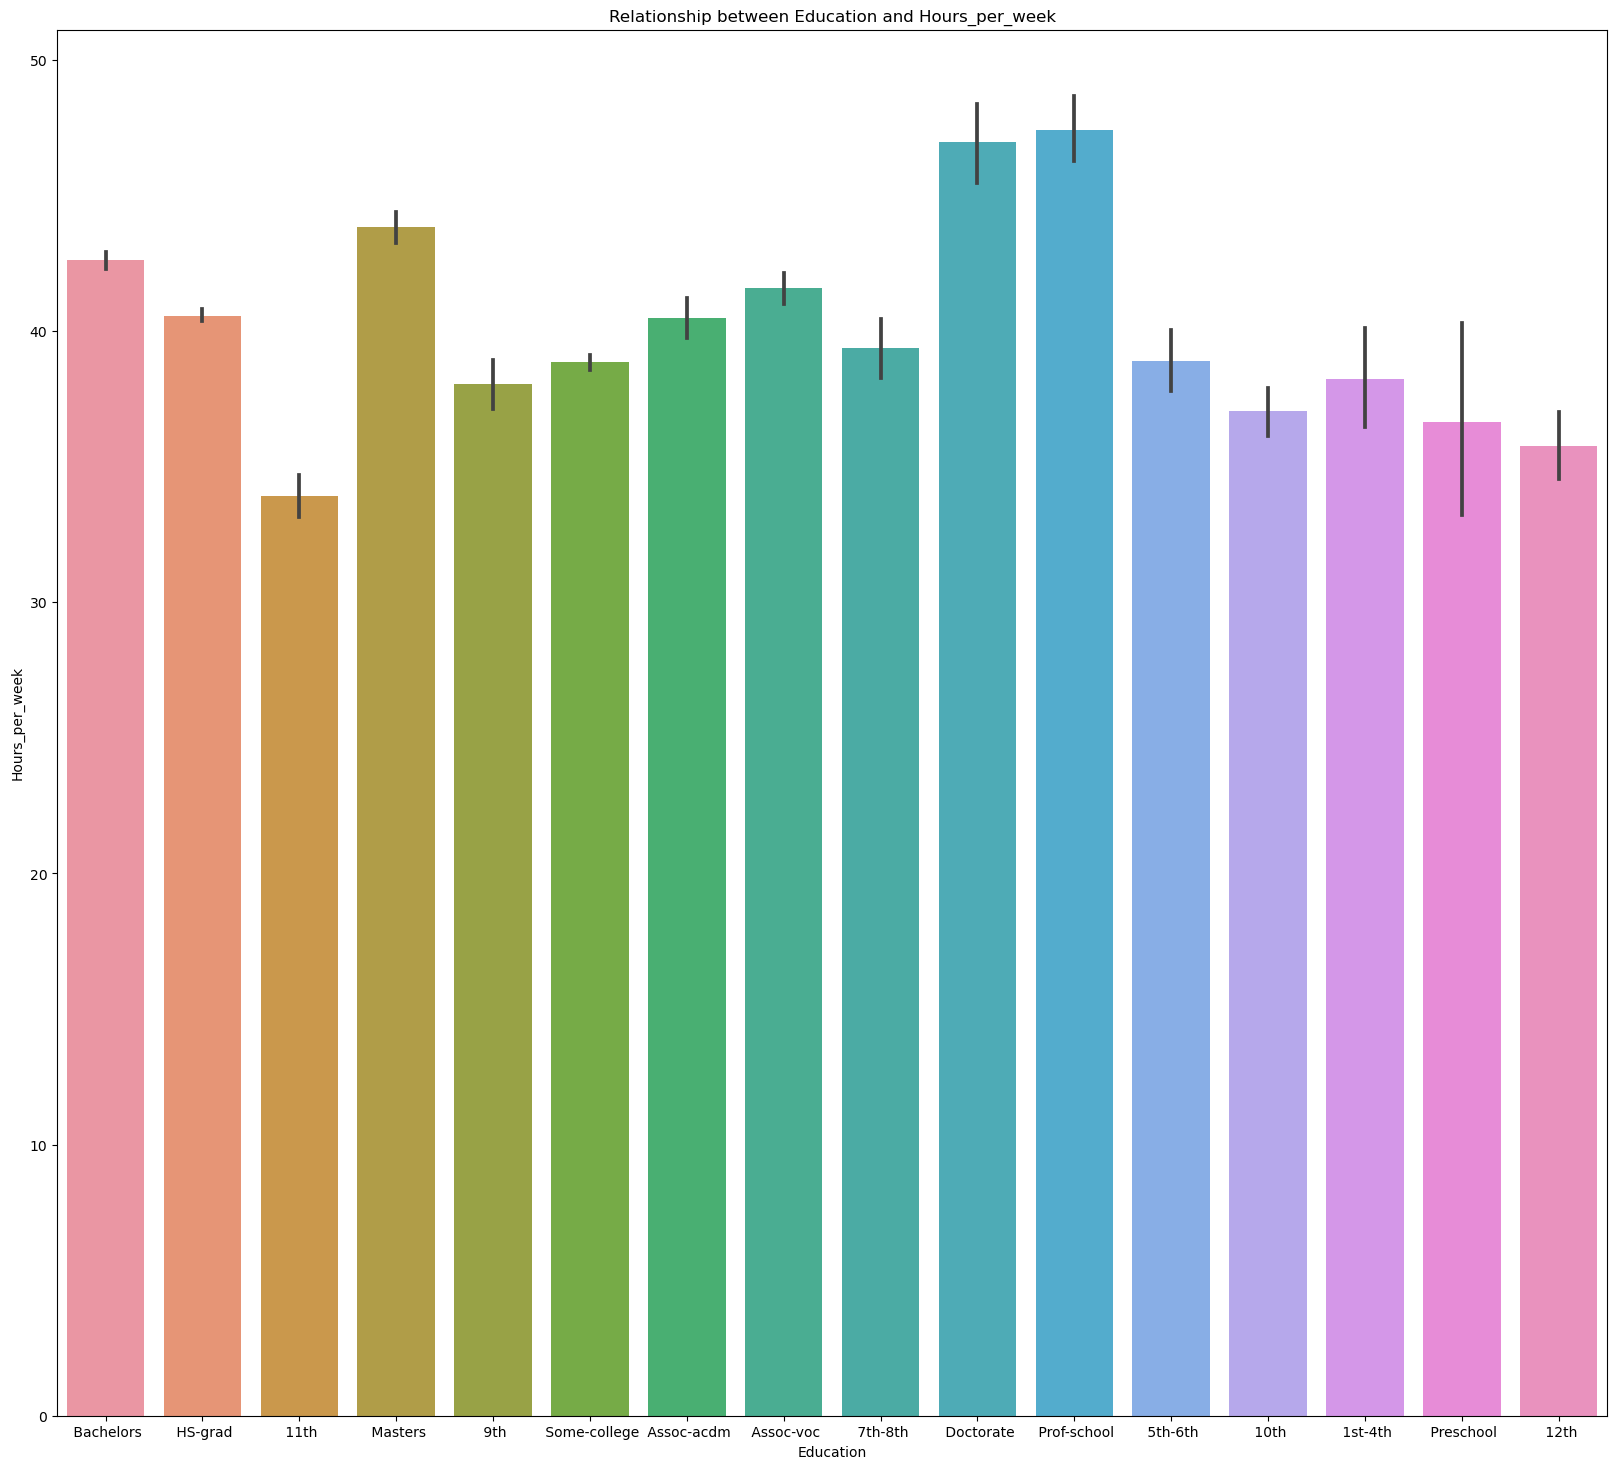

In [39]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Education", y="Hours_per_week", data=df)

# Set labels and title
plt.xlabel("Education")
plt.ylabel("Hours_per_week")
plt.title("Relationship between Education and Hours_per_week")

# Show the plot
plt.show()

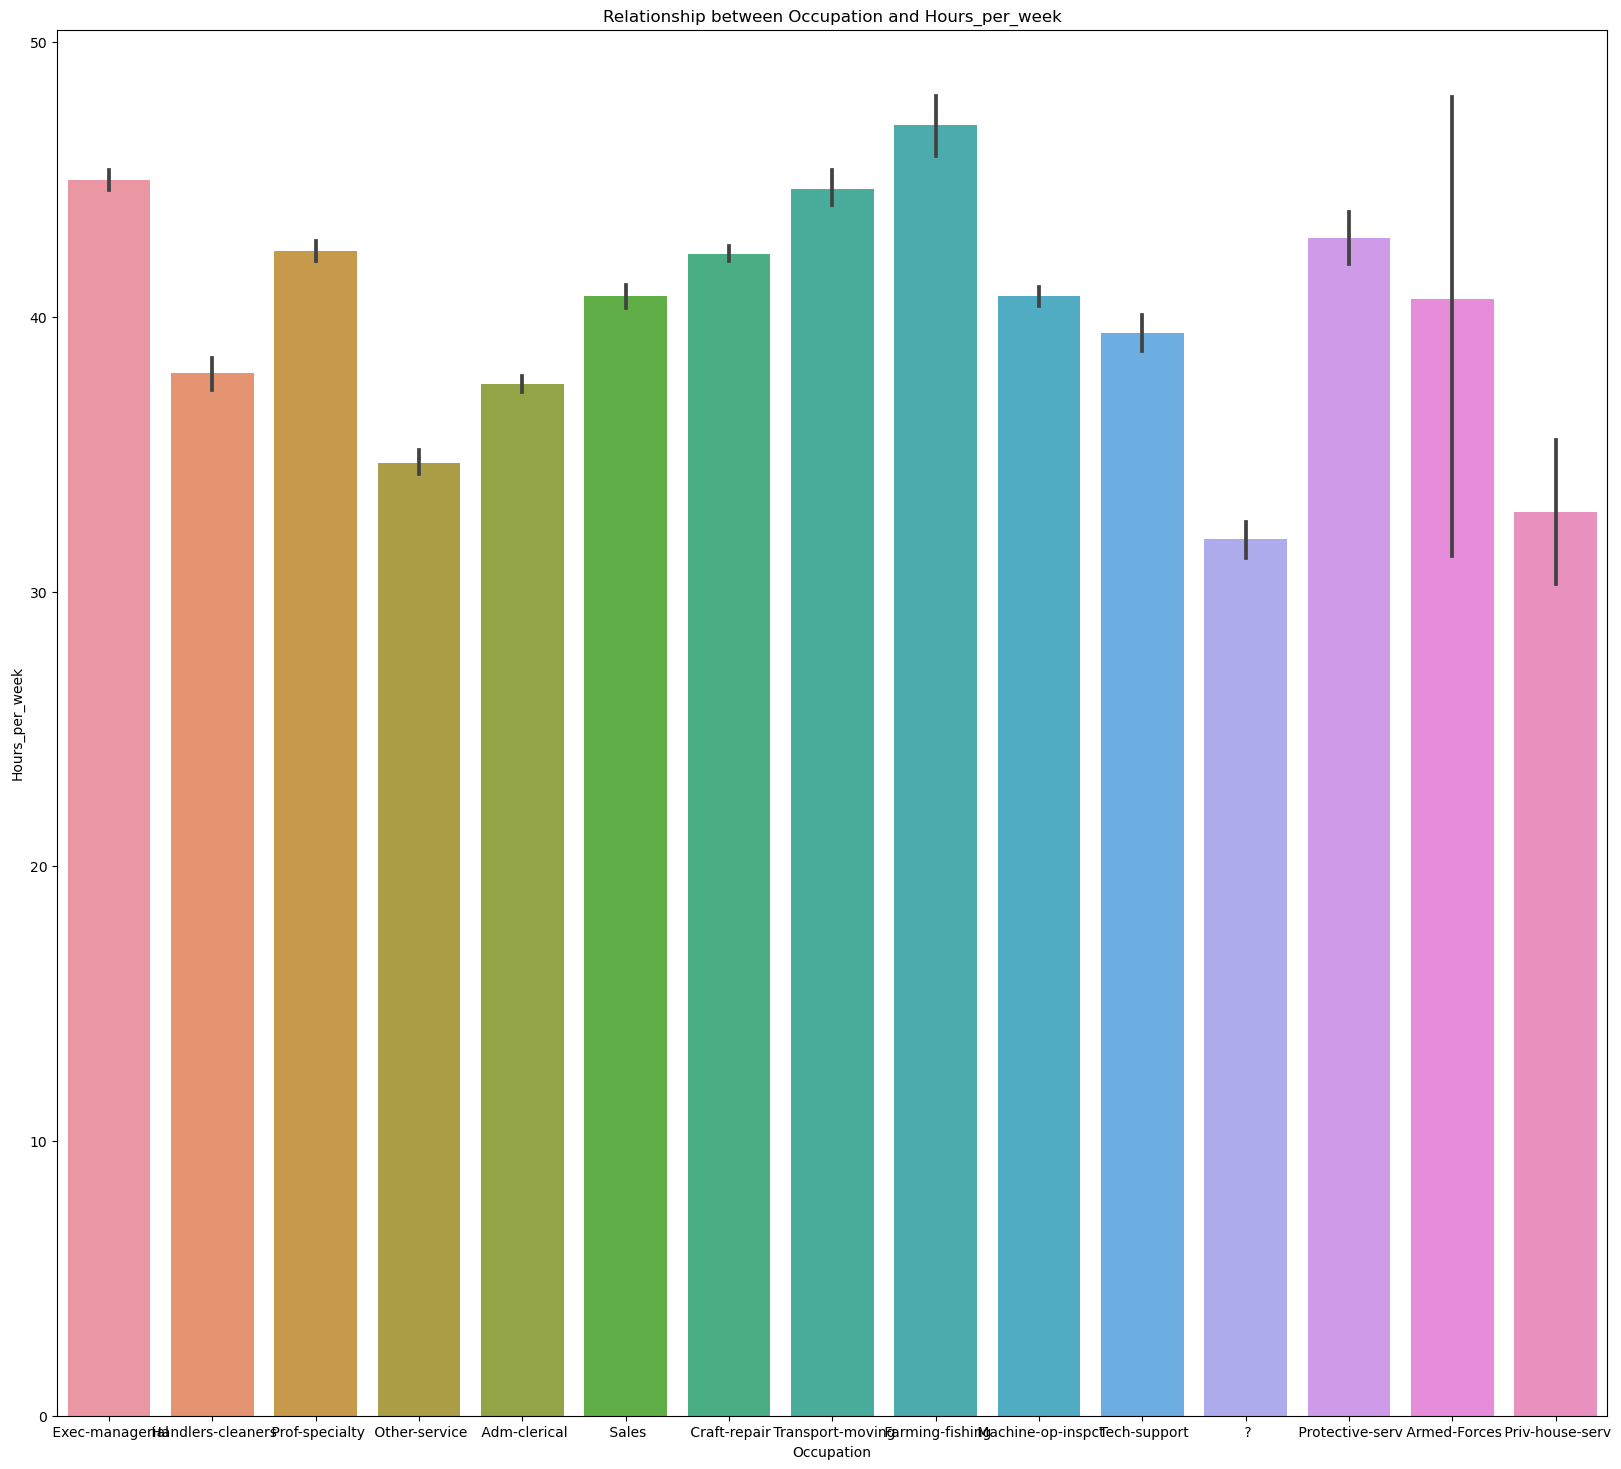

In [40]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Occupation", y="Hours_per_week", data=df)

# Set labels and title
plt.xlabel("Occupation")
plt.ylabel("Hours_per_week")
plt.title("Relationship between Occupation and Hours_per_week")

# Show the plot
plt.show()

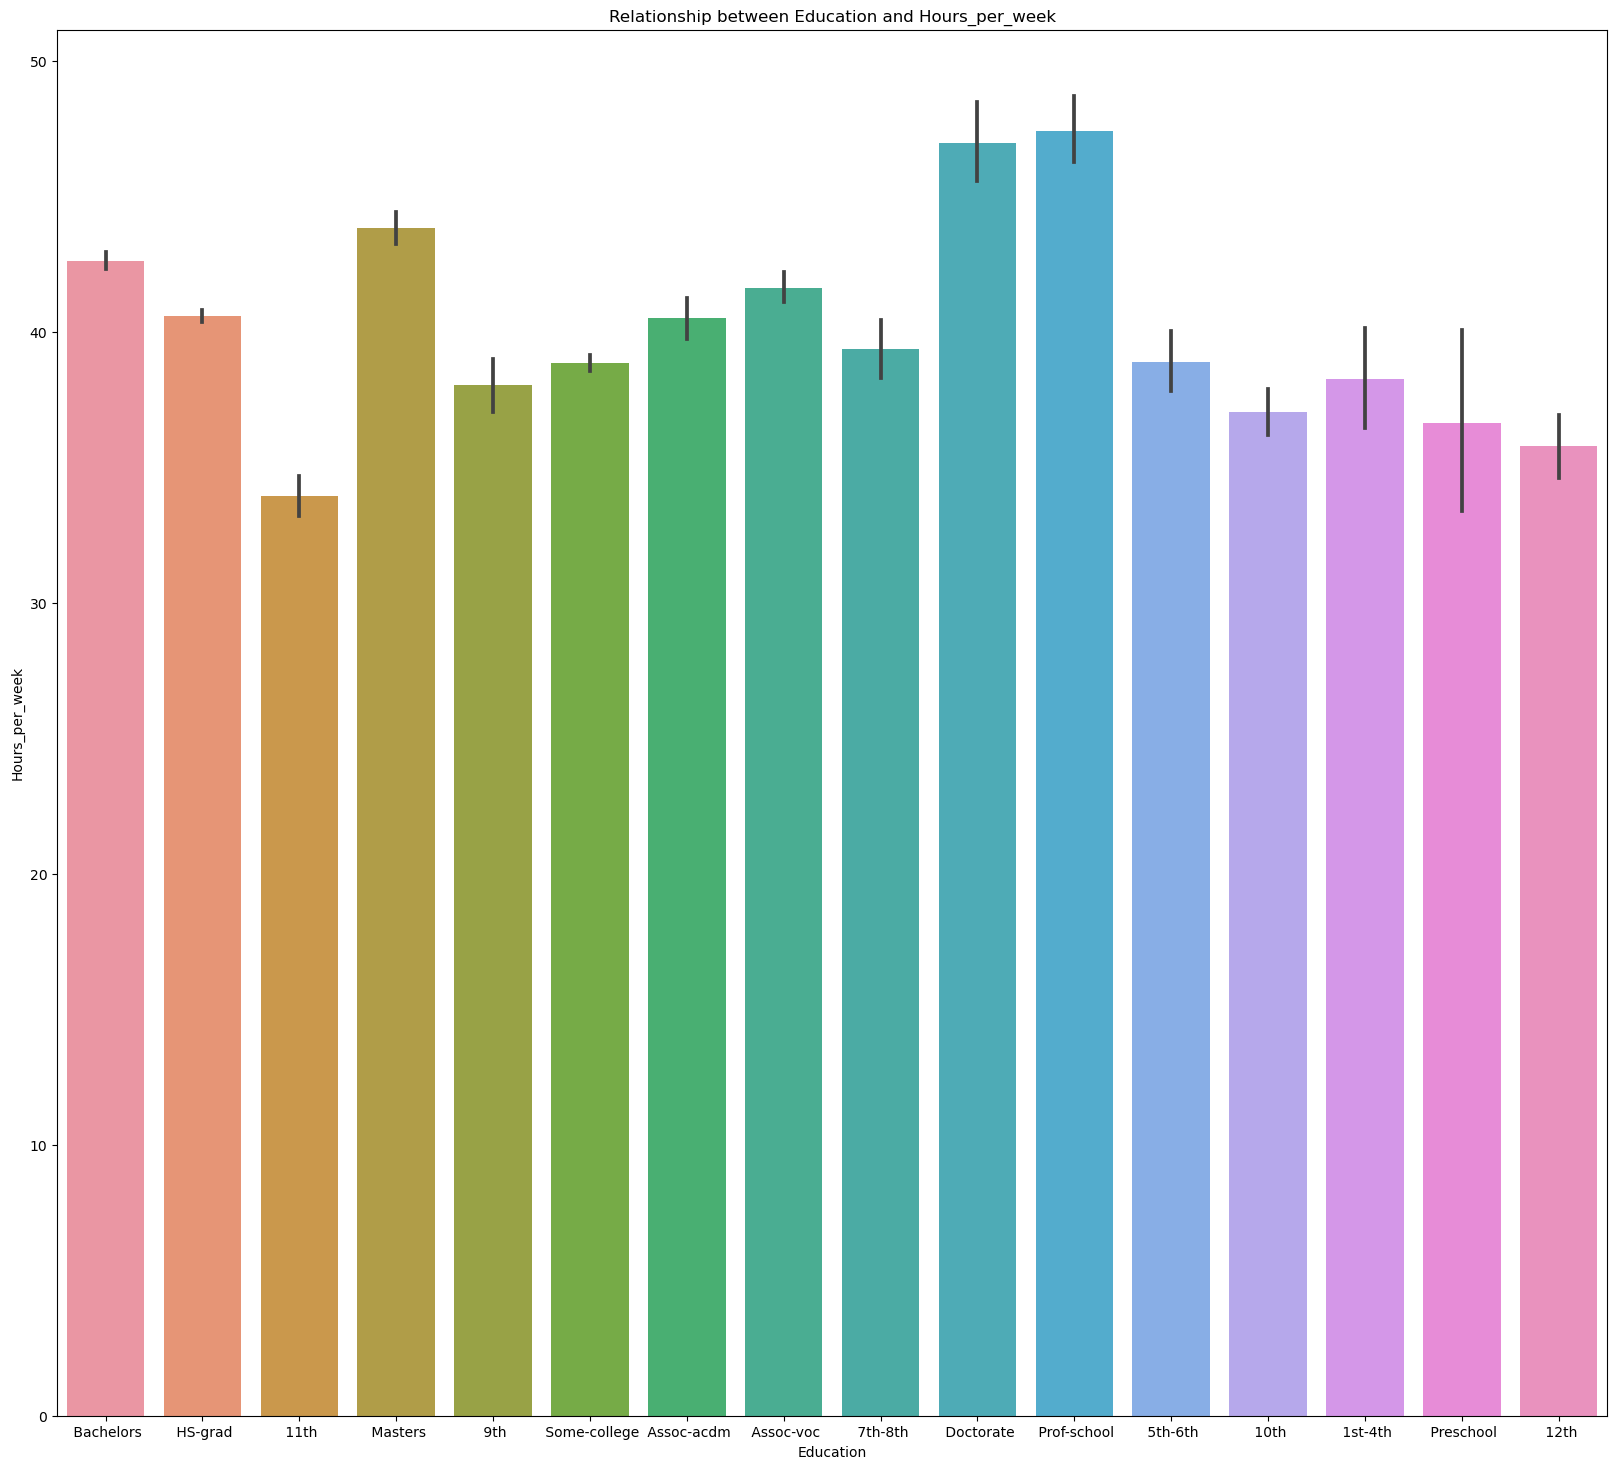

In [41]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Education", y="Hours_per_week", data=df)

# Set labels and title
plt.xlabel("Education")
plt.ylabel("Hours_per_week")
plt.title("Relationship between Education and Hours_per_week")

# Show the plot
plt.show()

In [42]:
# Now separating categorical columns and numercial columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_col :",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numercial_col :",numerical_col)

Categorical_col : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numercial_col : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


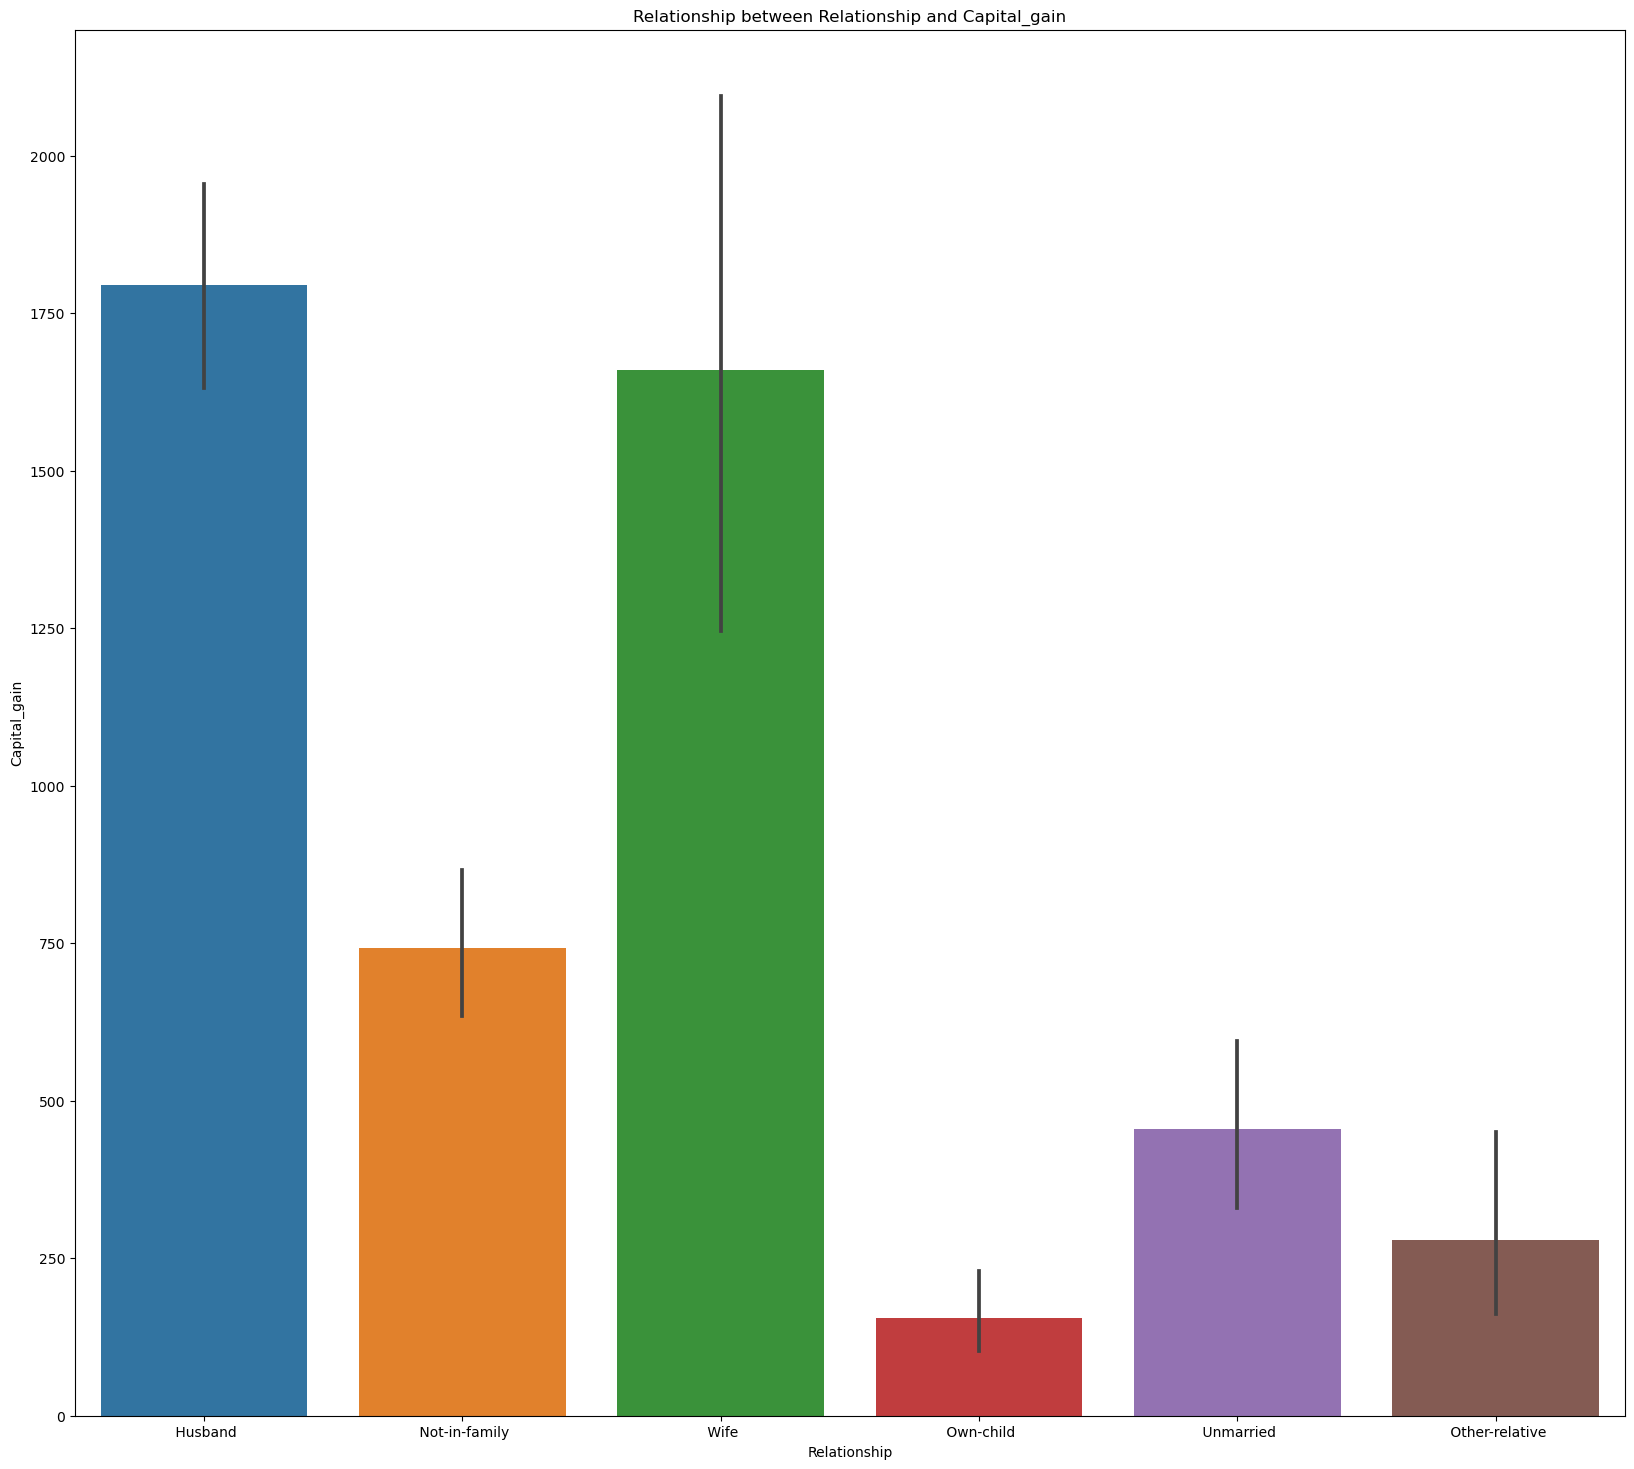

In [43]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Relationship", y="Capital_gain", data=df)

# Set labels and title
plt.xlabel("Relationship")
plt.ylabel("Capital_gain")
plt.title("Relationship between Relationship and Capital_gain")

# Show the plot
plt.show()

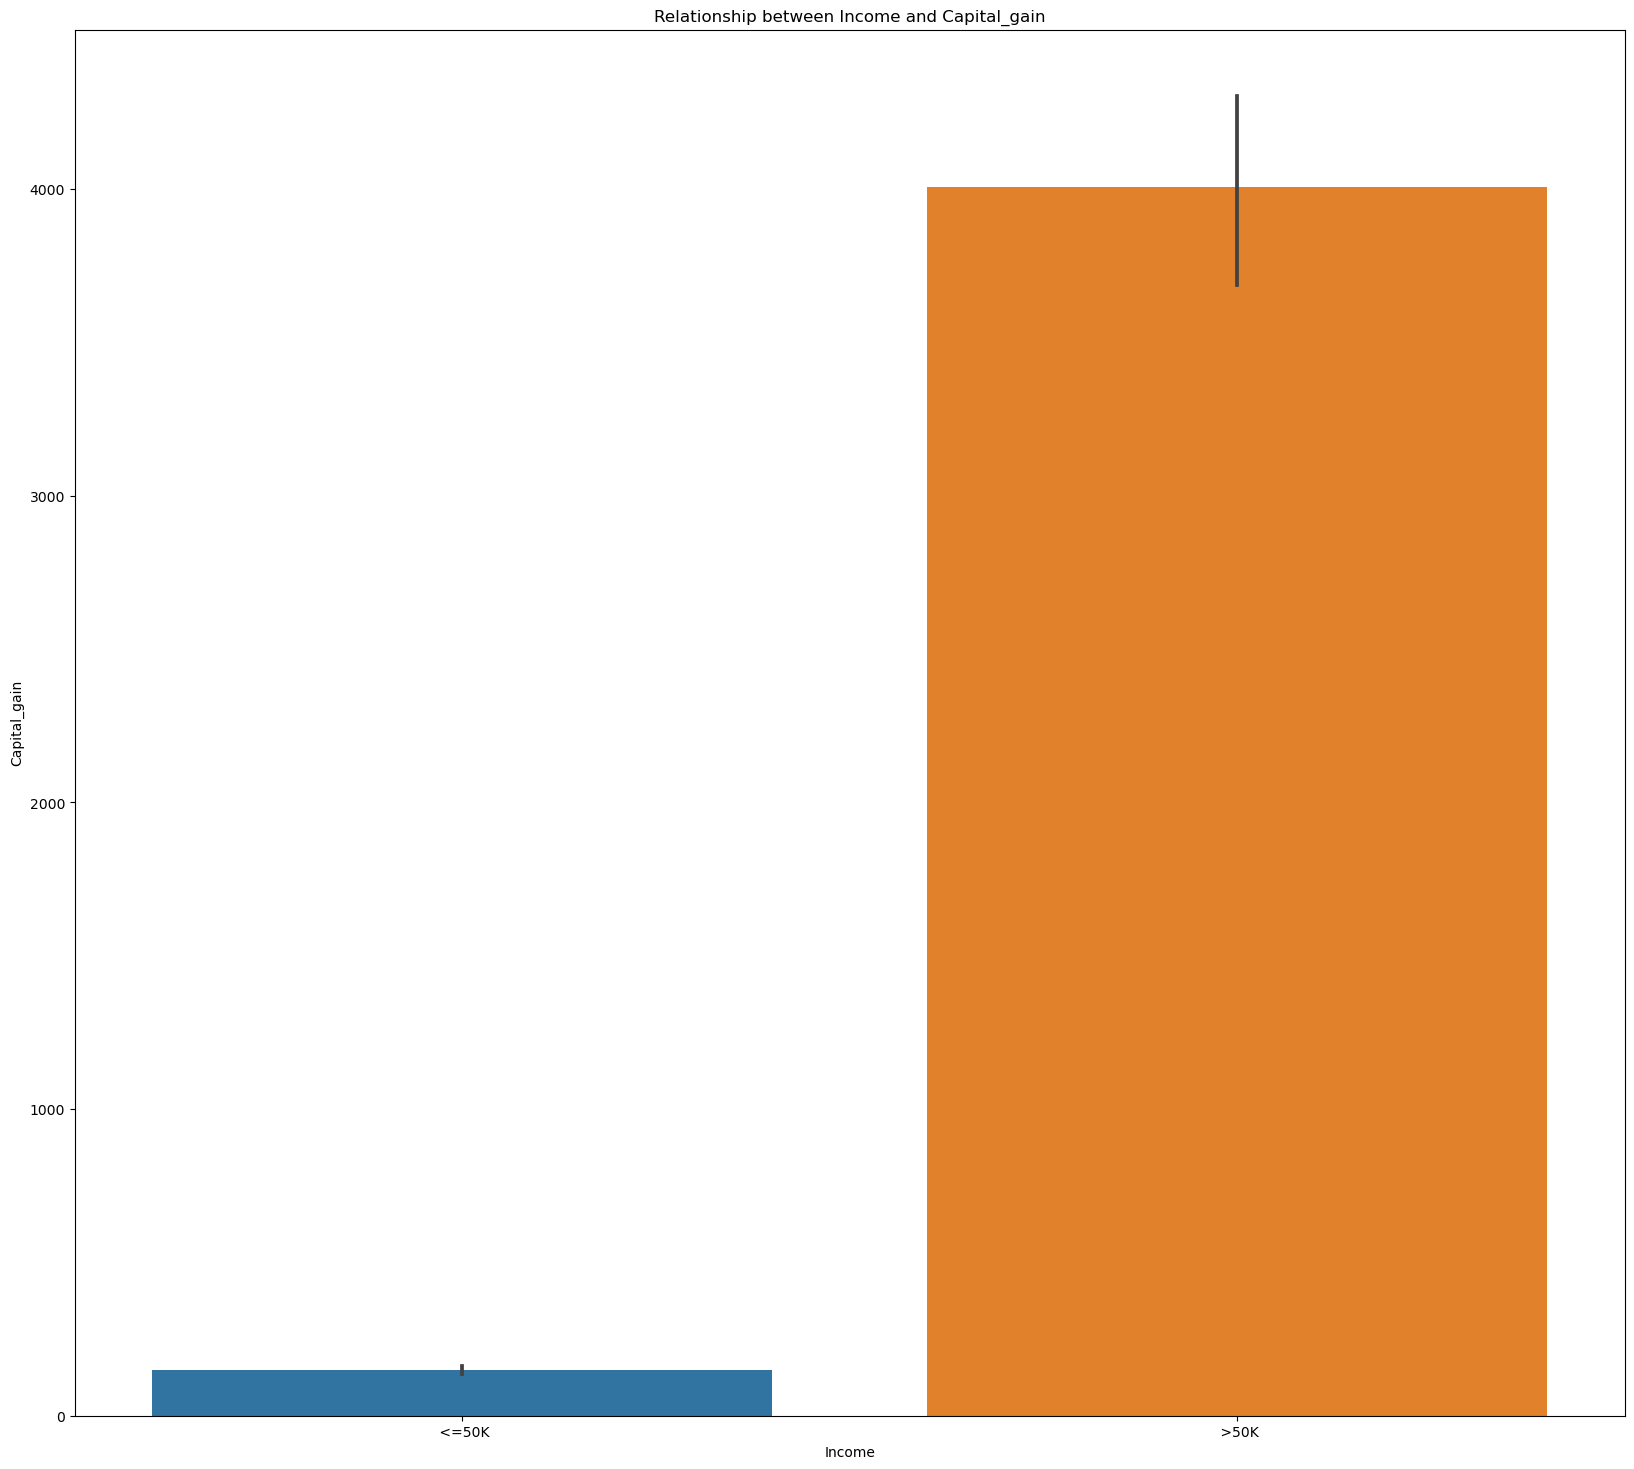

In [44]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Income", y="Capital_gain", data=df)

# Set labels and title
plt.xlabel("Income")
plt.ylabel("Capital_gain")
plt.title("Relationship between Income and Capital_gain")

# Show the plot
plt.show()

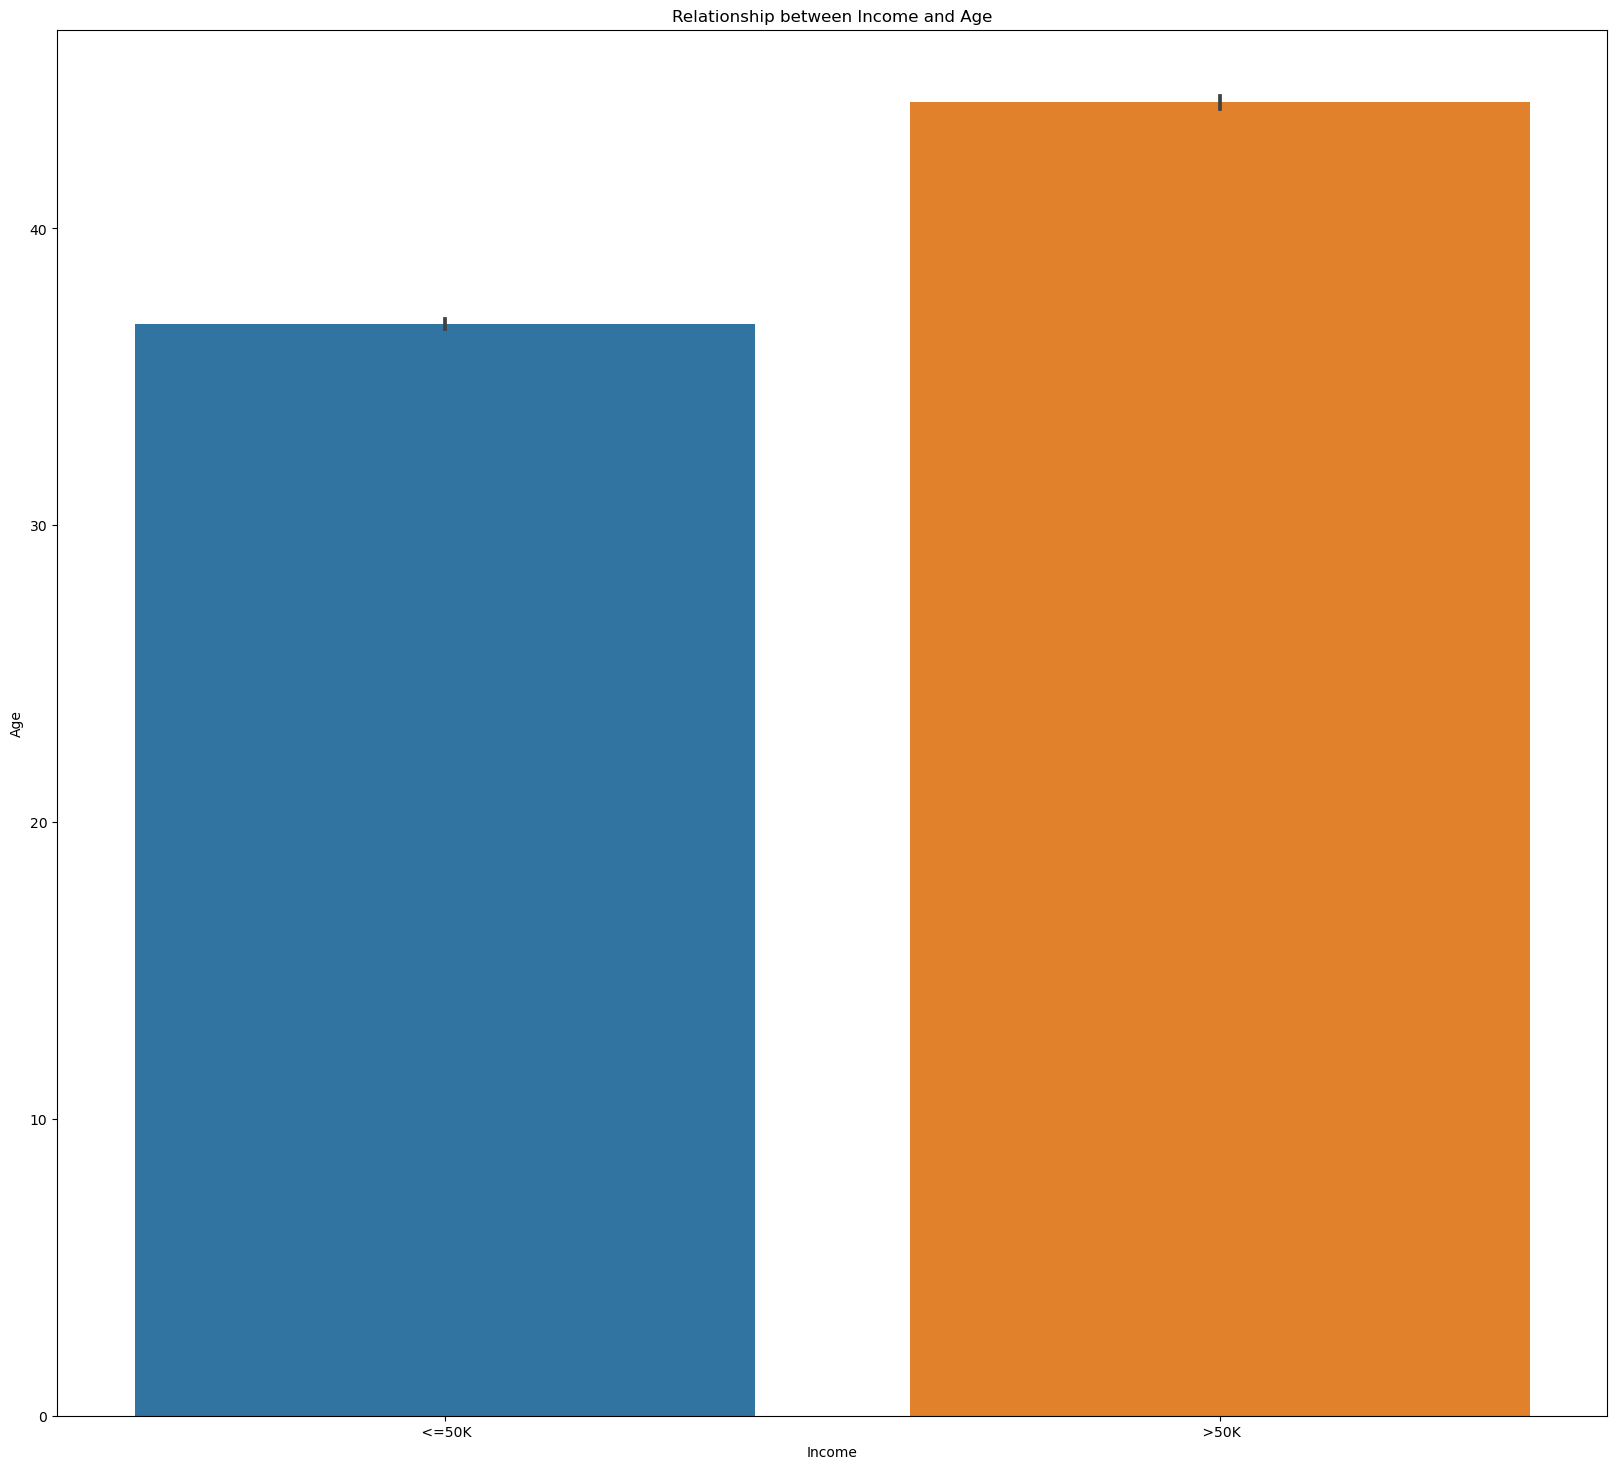

In [45]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Income", y="Age", data=df)

# Set labels and title
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Relationship between Income and Age")

# Show the plot
plt.show()

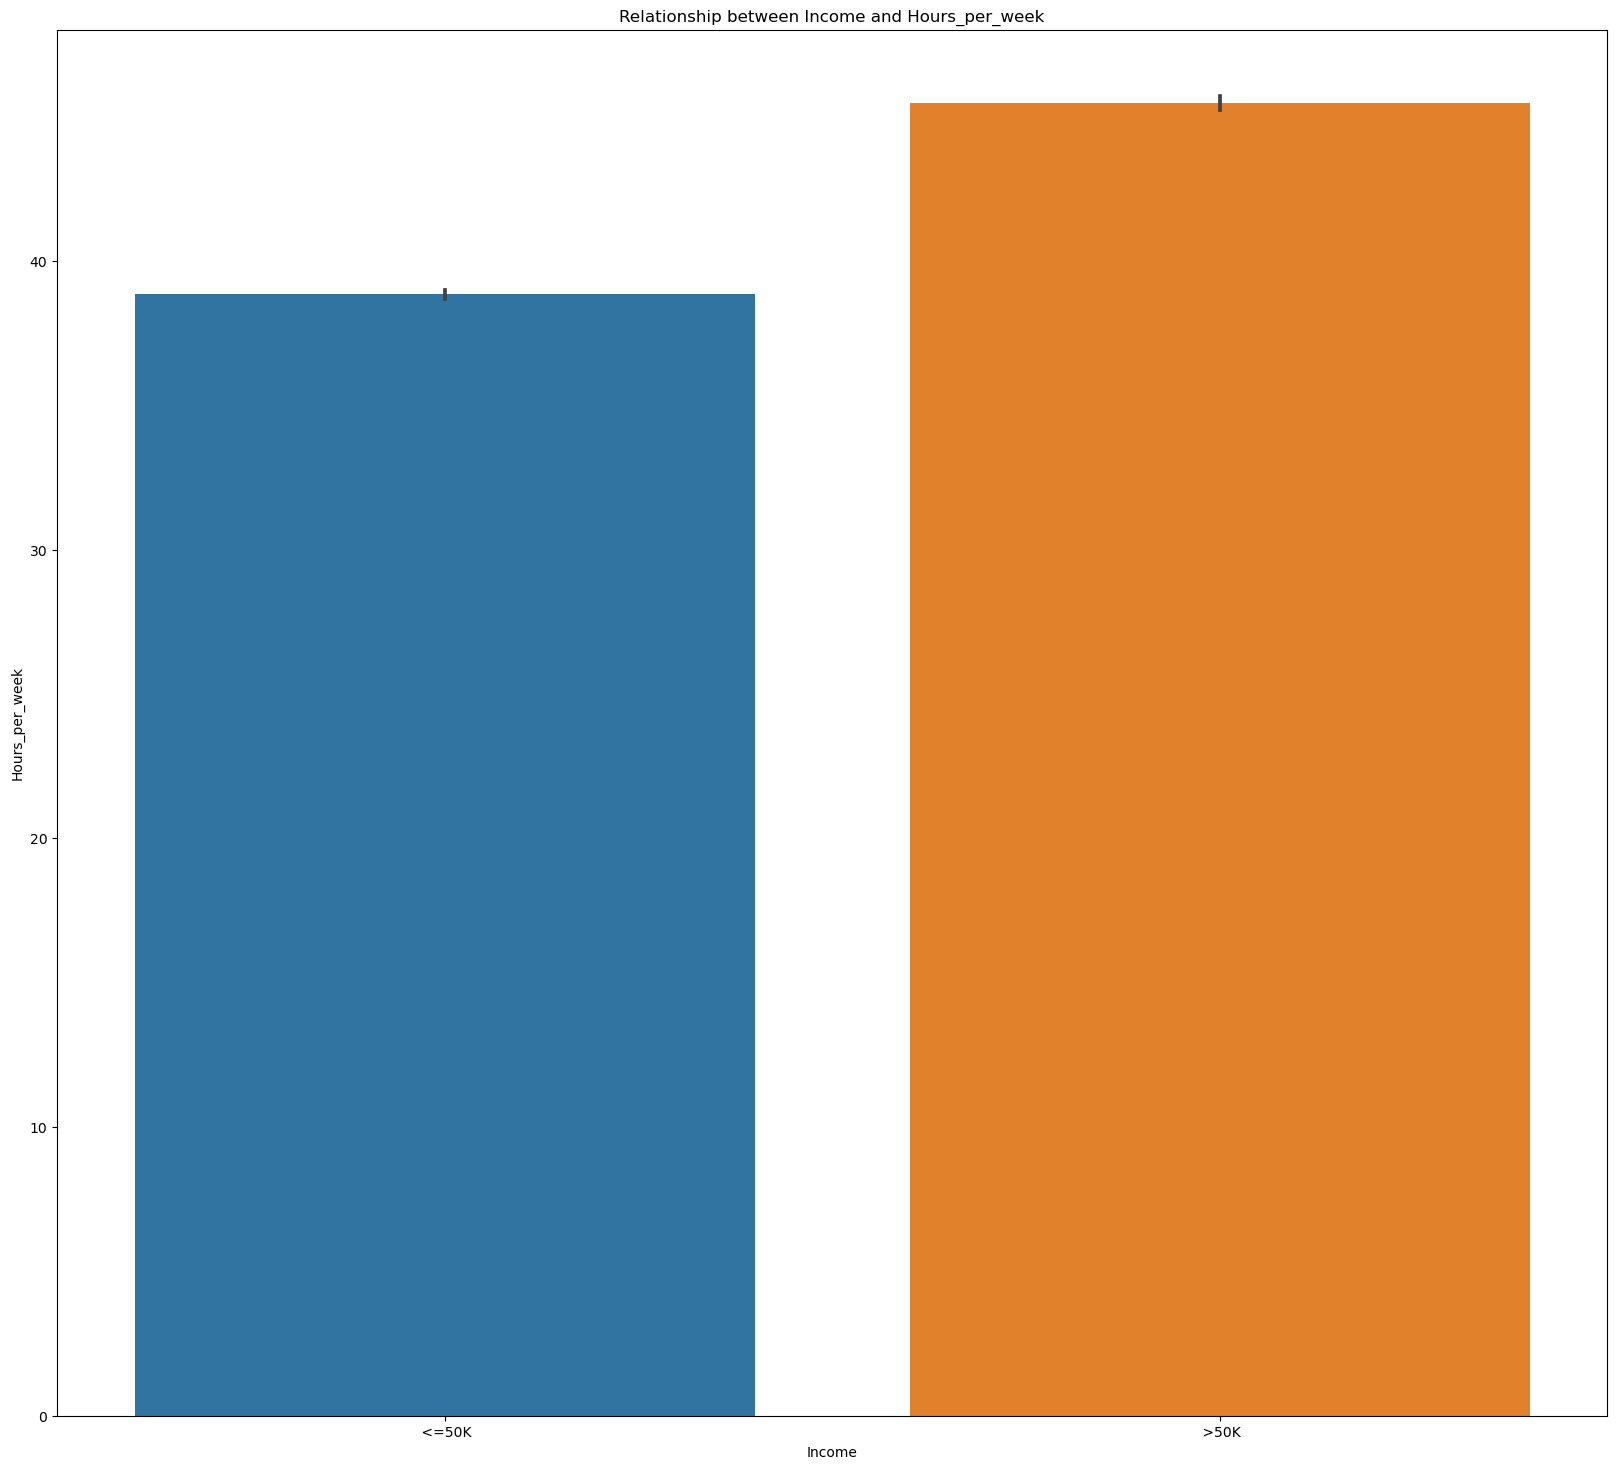

In [46]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Income", y="Hours_per_week", data=df)

# Set labels and title
plt.xlabel("Income")
plt.ylabel("Hours_per_week")
plt.title("Relationship between Income and Hours_per_week")

# Show the plot
plt.show()

# Checking for outliers

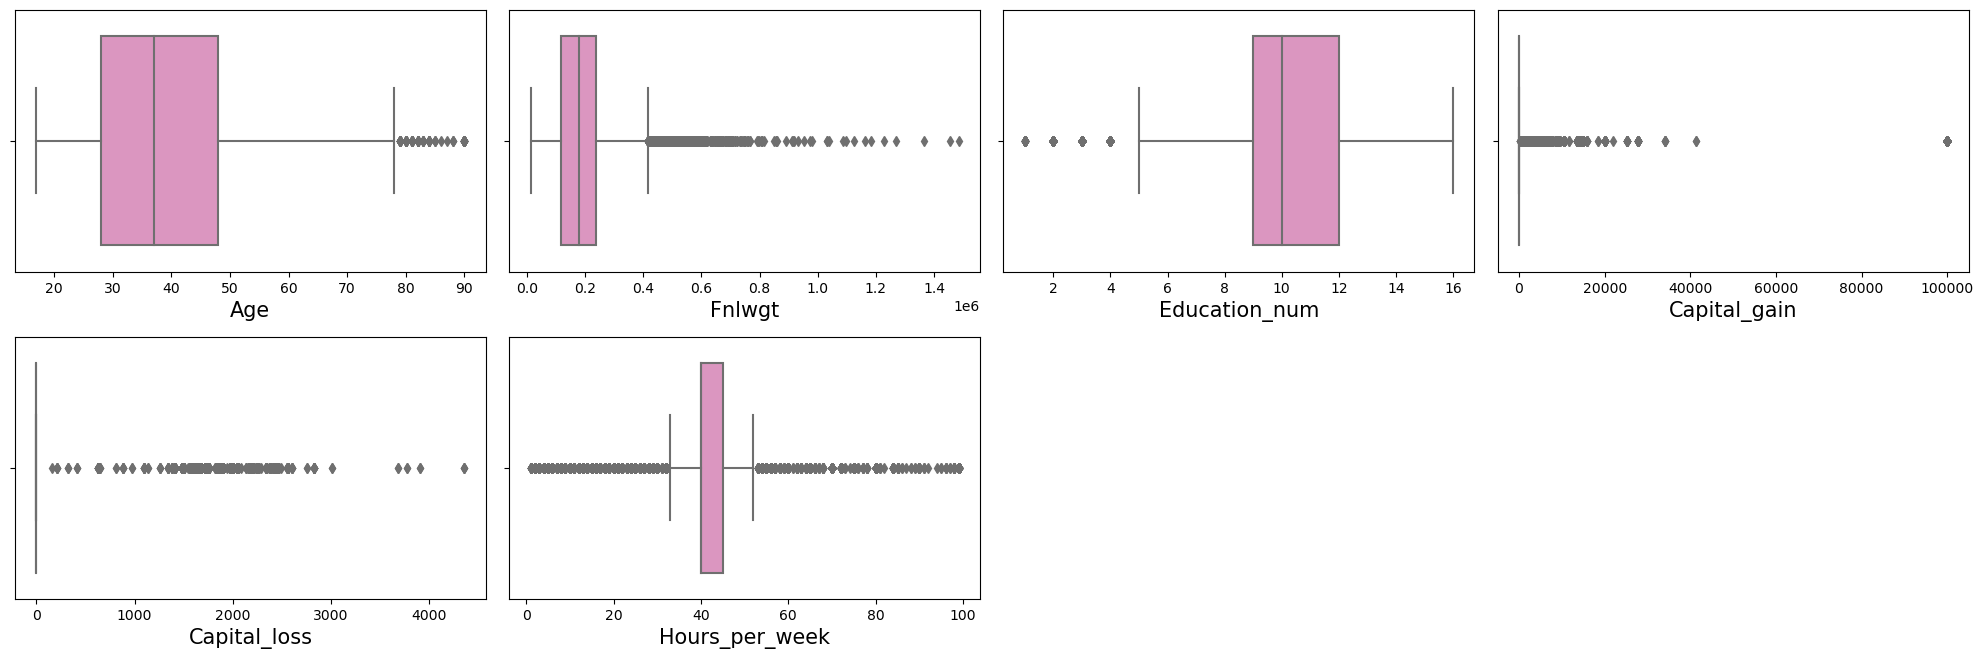

In [47]:
# Now we check the data have outliers or not
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

Almost all columns contains outliers

# Using IQR method to remove outliers

In [48]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)


DataFrame after removing outliers:
       Age          Workclass  Fnlwgt      Education  Education_num  \
1       38            Private  215646        HS-grad              9   
2       53            Private  234721           11th              7   
3       28            Private  338409      Bachelors             13   
4       37            Private  284582        Masters             14   
6       52   Self-emp-not-inc  209642        HS-grad              9   
...    ...                ...     ...            ...            ...   
32553   53            Private  321865        Masters             14   
32554   22            Private  310152   Some-college             10   
32555   27            Private  257302     Assoc-acdm             12   
32556   40            Private  154374        HS-grad              9   
32557   58            Private  151910        HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
1                 Divorced   Handlers-

# Ordinal Encoder

In [49]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize Ordinal Encoder
OE = OrdinalEncoder()

mappings = {}

# Encoding categorical columns
for col in df1.columns:
    if df1[col].dtype == "object":
        original_values = df1[col].unique()
        df1[col] = OE.fit_transform(df1[[col]])
        encoded_values = OE.transform(original_values.reshape(-1, 1)).flatten()
        mappings[col] = dict(zip(original_values, encoded_values))

print("Encoded DataFrame:\n", df1)
print("\nMappings for each column:")
for col, mapping in mappings.items():
    print(f"{col} mapping:", mapping)

Encoded DataFrame:
        Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
1       38        4.0  215646        8.0              9             0.0   
2       53        4.0  234721        1.0              7             2.0   
3       28        4.0  338409        6.0             13             2.0   
4       37        4.0  284582        9.0             14             2.0   
6       52        6.0  209642        8.0              9             2.0   
...    ...        ...     ...        ...            ...             ...   
32553   53        4.0  321865        9.0             14             2.0   
32554   22        4.0  310152       11.0             10             4.0   
32555   27        4.0  257302        4.0             12             2.0   
32556   40        4.0  154374        8.0              9             2.0   
32557   58        4.0  151910        8.0              9             6.0   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
1    

Here we can see that categorical columns convert into numerical columns.

# Cheking how the data is distributed

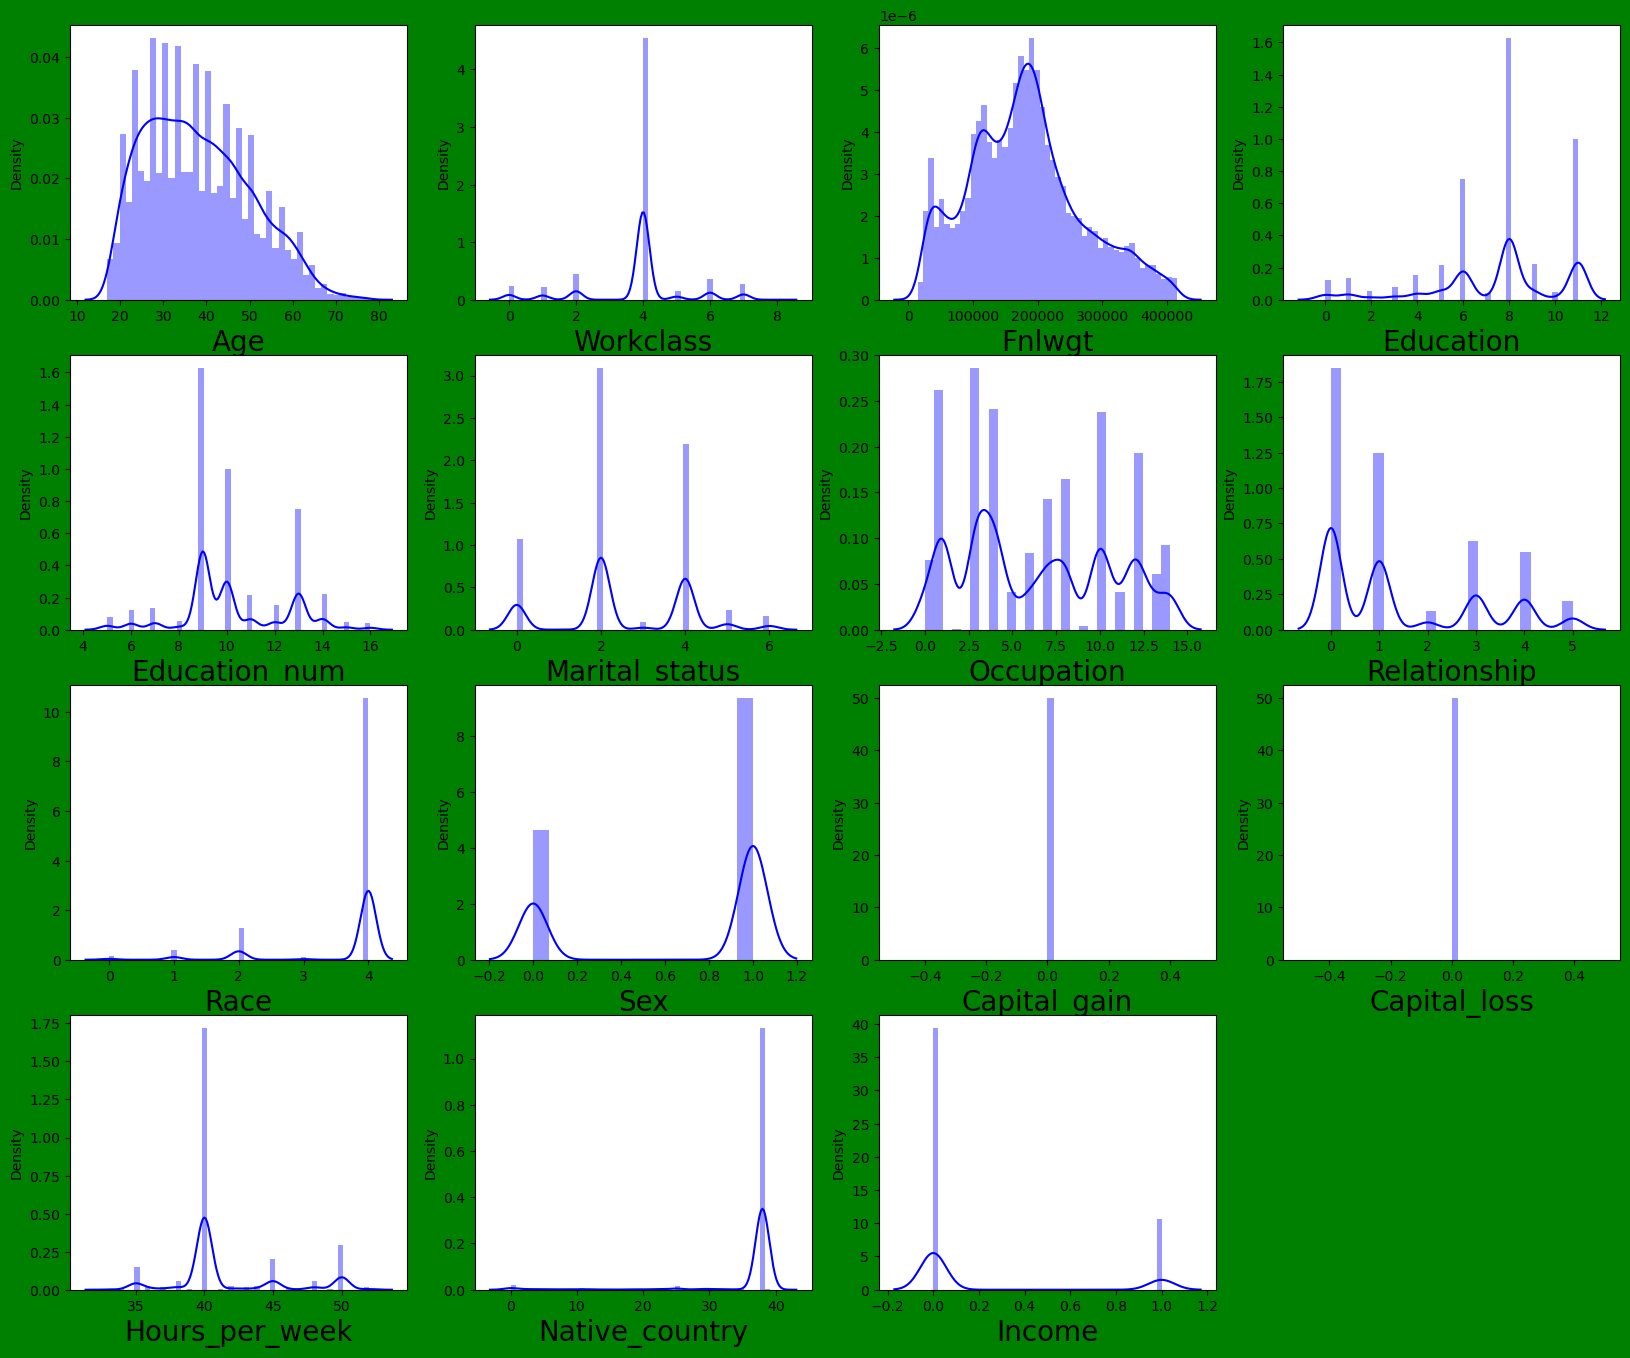

In [50]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df1:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

# Now checking skewness

In [51]:
# Now all data are converted into numercial form so no we check skewness
df1.skew()

Age               0.435155
Workclass        -0.638891
Fnlwgt            0.409966
Education        -0.790257
Education_num     0.261112
Marital_status   -0.037393
Occupation        0.206010
Relationship      0.817340
Race             -2.333145
Sex              -0.719090
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    1.067612
Native_country   -3.834320
Income            1.411828
dtype: float64

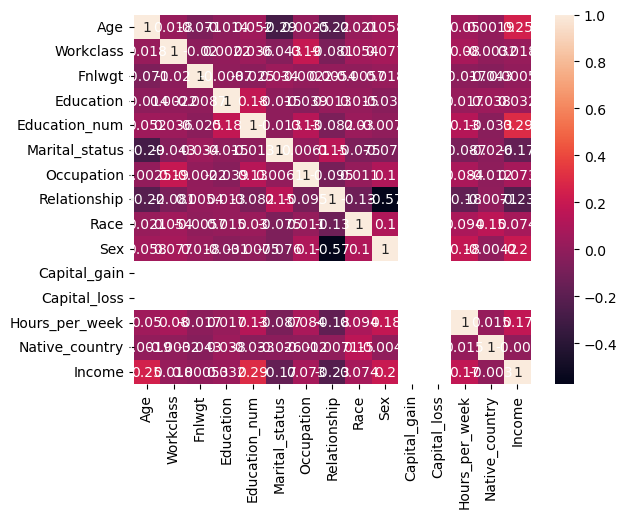

In [52]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Separating Features and  Label

In [53]:
# Separating the independent and target variables into x and y
x = df1.drop(['Income'], axis=1)  # Features without the 'Income' column
y = df1['Income']

print("Feature Dimensions= ", x.shape)
print("Label Dimensions= ", y.shape)

Feature Dimensions=  (18997, 14)
Label Dimensions=  (18997,)


# Oversampling 

In [54]:
#Now we check y values 
y.value_counts()

0.0    14976
1.0     4021
Name: Income, dtype: int64

In [55]:
# Oversampling used to balance the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [56]:
y1.value_counts()

0.0    14976
1.0    14976
Name: Income, dtype: int64

# Now find the best model

In [57]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# Modelling

In [58]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestClassifier
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)  
    
    # Making predictions on the test set
    pred = RFR.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

In [59]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.8940574226574671 at random_state 53


# Creating train test split

In [60]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=maxRS)

# Random Forest Classifier

In [61]:
# Instantiate and train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)

Accuracy: 0.8924994435789005
Confusion Matrix:
[[4121  437]
 [ 529 3899]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      4558
         1.0       0.90      0.88      0.89      4428

    accuracy                           0.89      8986
   macro avg       0.89      0.89      0.89      8986
weighted avg       0.89      0.89      0.89      8986



# Ada Boost Classifier

In [62]:
# Instantiate and train AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)

# Make predictions on the test set
pred_ABC = ABC.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_ABC)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ABC)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_ABC)
print("Classification Report:")
print(report)

Accuracy: 0.8823725795682172
Confusion Matrix:
[[4004  554]
 [ 503 3925]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      4558
         1.0       0.88      0.89      0.88      4428

    accuracy                           0.88      8986
   macro avg       0.88      0.88      0.88      8986
weighted avg       0.88      0.88      0.88      8986



# Bagging Classifier

In [63]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
pred_bc=BC.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_bc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_bc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_bc)
print("Classification Report:")
print(report)

Accuracy: 0.8763632316937459
Confusion Matrix:
[[4109  449]
 [ 662 3766]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      4558
         1.0       0.89      0.85      0.87      4428

    accuracy                           0.88      8986
   macro avg       0.88      0.88      0.88      8986
weighted avg       0.88      0.88      0.88      8986



# Extra Trees Classifier

In [64]:
# Checking accuracy for the ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_et=ET.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_et)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_et)
print("Classification Report:")
print(report)

Accuracy: 0.8884932116625862
Confusion Matrix:
[[4059  499]
 [ 503 3925]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      4558
         1.0       0.89      0.89      0.89      4428

    accuracy                           0.89      8986
   macro avg       0.89      0.89      0.89      8986
weighted avg       0.89      0.89      0.89      8986



# Hyper Parameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

# Define the parameter 
parameters = {'criterion':['gini','entropy'],
              'random_state':[10,50,1000],
              'max_depth': [0,10,20],
              'n_jobs':[-2,-1,1],
              'n_estimators' : [50,100,200,300]}

In [66]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv = 5)

In [67]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [68]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [76]:
Model = ExtraTreesClassifier ( criterion = "gini" , max_depth = 20,n_jobs = -2,random_state = 10,n_estimators = 100)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

88.67126641442243


# Saving the model

In [77]:
# Saving the model
import joblib
joblib.dump(Model,"Census_income.pkl")

['Census_income.pkl']

In [78]:
import pickle
filename = "Census_income.pkl"
pickle.dump(Model, open(filename,'wb'))  #Saved model

# Predicted the saved model

In [79]:
load_model = pickle.load(open("Census_income.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

88.67126641442243


In [80]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Predicted the income and now making the diagram

In [81]:
import numpy as np

# Define the mapping dictionaries
Workclass_mapping = {' Private': 4.0, ' Self-emp-not-inc': 6.0, ' State-gov': 7.0, ' Federal-gov': 1.0, ' Local-gov': 2.0, ' Self-emp-inc': 5.0, ' ?': 0.0, ' Never-worked': 3.0, ' Without-pay': 8.0}
Education_mapping = {' HS-grad': 8.0, ' 11th': 1.0, ' Bachelors': 6.0, ' Masters': 9.0, ' Assoc-acdm': 4.0, ' Assoc-voc': 5.0, ' 9th': 3.0, ' Some-college': 11.0, ' Doctorate': 7.0, ' Prof-school': 10.0, ' 10th': 0.0, ' 12th': 2.0}
Marital_status_mapping = {' Divorced': 0.0, ' Married-civ-spouse': 2.0, ' Never-married': 4.0, ' Separated': 5.0, ' Widowed': 6.0, ' Married-spouse-absent': 3.0, ' Married-AF-spouse': 1.0}
Occupation_mapping = {' Handlers-cleaners': 6.0, ' Prof-specialty': 10.0, ' Exec-managerial': 4.0, ' Sales': 12.0, ' Craft-repair': 3.0, ' Farming-fishing': 5.0, ' Machine-op-inspct': 7.0, ' Tech-support': 13.0, ' Protective-serv': 11.0, ' Adm-clerical': 1.0, ' Other-service': 8.0, ' Transport-moving': 14.0, ' ?': 0.0, ' Armed-Forces': 2.0, ' Priv-house-serv': 9.0}
Relationship_mapping = {' Not-in-family': 1.0, ' Husband': 0.0, ' Wife': 5.0, ' Own-child': 3.0, ' Unmarried': 4.0, ' Other-relative': 2.0}
Race_mapping = {' White': 4.0, ' Black': 2.0, ' Asian-Pac-Islander': 1.0, ' Other': 3.0, ' Amer-Indian-Eskimo': 0.0}
Sex_mapping = {' Male': 1.0, ' Female': 0.0}
Native_country_mapping = {' United-States': 38.0, ' Cuba': 5.0, ' India': 18.0, ' ?': 0.0, ' Puerto-Rico': 32.0, ' Mexico': 25.0, ' England': 9.0, ' Germany': 11.0, ' Iran': 19.0, ' Philippines': 29.0, ' Italy': 21.0, ' Poland': 30.0, ' Cambodia': 1.0, ' Laos': 24.0, ' Portugal': 31.0, ' France': 10.0, ' El-Salvador': 8.0, ' Taiwan': 35.0, ' Dominican-Republic': 6.0, ' Jamaica': 22.0, ' Honduras': 15.0, ' Haiti': 14.0, ' South': 34.0, ' Japan': 23.0, ' Yugoslavia': 40.0, ' Canada': 2.0, ' China': 3.0, ' Peru': 28.0, ' Outlying-US(Guam-USVI-etc)': 27.0, ' Scotland': 33.0, ' Trinadad&Tobago': 37.0, ' Greece': 12.0, ' Nicaragua': 26.0, ' Guatemala': 13.0, ' Vietnam': 39.0, ' Hong': 16.0, ' Ireland': 20.0, ' Columbia': 4.0, ' Ecuador': 7.0, ' Thailand': 36.0, ' Hungary': 17.0}
Income_mapping = {' <=50K': 0.0, ' >50K': 1.0}

# Define the input data (subscribed characteristics)
input_data = [40," Private",154374," HS-grad",9," Married-civ-spouse"," Machine-op-inspct"," Husband"," White"," Male",0,0,40," United-States"]

# Convert the input data using the mappings
input_data_numerical = [
    input_data[0],  # Age
    Workclass_mapping[input_data[1]],
    input_data[2],  # fnlwgt
    Education_mapping[input_data[3]],
    input_data[4],  # Education-Num
    Marital_status_mapping[input_data[5]],
    Occupation_mapping[input_data[6]],
    Relationship_mapping[input_data[7]],
    Race_mapping[input_data[8]],
    Sex_mapping[input_data[9]],
    input_data[10],  # Capital-Gain
    input_data[11],  # Capital-Loss
    input_data[12],  # Hours-per-week
    Native_country_mapping[input_data[13]]
]

# Assuming `load_model` is already defined and loaded with the trained model
# Make prediction using the trained model
prediction = load_model.predict([input_data_numerical])

# Print the input data and predicted Income
print("Input Data (Numerical):", input_data_numerical)
print("Predicted Income:", prediction)

Input Data (Numerical): [40, 4.0, 154374, 8.0, 9, 2.0, 7.0, 0.0, 4.0, 1.0, 0, 0, 40, 38.0]
Predicted Income: [1.]


In [82]:
# Assuming 'conclusion' is the predicted class label (0, 1, or 2)
if prediction == 1:
    print("Its income is Greater than >50K")
else:
    print("Its income is less than equal to  <=50K")  # Handle unexpected values

Its income is Greater than >50K


# THANK YOU